## Progetto di Fondamenti  di Analisi  Dati 
##### Nome Studente: Andrea Filippo Salemi
##### Corso di studi: Informatica LM-18
#### Dataset : Netflix Movies and TV Shows
#### Link Dataset: https://www.kaggle.com/datasets/shivamb/netflix-shows/data


### Breve Descrizione del dataset
Il dataset che verrà usato per l'analisi conterrà un insieme di dati <br>
del catalogo netlix con più di 8000 film e serie TV (Aggiornata alla metà del 2021). <br>
Inoltre, sono presenti numerosi campi tra cui: Titolo, paese, cast, rating. <br>

Per prima cosa si importano le librerie : <br><br>
<t><b>sklearn (scikit-learn)</b> : Libreria usata per  usare degli strumenti di machine learning (usata per l'analisi predittiva per esempio); </b> </t><br>
<t><b>pandas</b> : libreria per l'analisi e manipolazione dei dati; </t><br>
<t><b>numpy</b> : Libreria usata per lavorare con gli array e funzioni matematiche; </t><br>
<t> <b>matplotlib</b> : Libreria usata per plottare i diversi tipi di grafici; </t>
<br>
<t> <b> scipy </b> : libreria usara per il calcolo scientifico e l'analisi numerica </t><br>
<t> <b>seaborn</b> : Libreria usato per scopi statistici. </t>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import (
    MinMaxScaler, StandardScaler, LabelEncoder, 
    OneHotEncoder
)


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from sklearn.metrics import (
    mean_squared_error, accuracy_score, classification_report, confusion_matrix,
    r2_score, precision_score, recall_score, f1_score, roc_curve, auc,
    roc_auc_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score
)

from scipy import stats
from scipy.sparse import hstack
model_time = LinearRegression()
scaler_cluster = StandardScaler()
kmeans = KMeans(n_clusters=4, random_state=42)
pca = PCA(n_components=2)
model_type = LogisticRegression(max_iter=1000)


Carichiamo il dataset:

In [2]:
csv_path = "./Dataset/netflix_titles.csv"
df = pd.read_csv(csv_path, encoding='latin-1') 

Mostriamo il contenuto dei primi 5 valori:

In [3]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Come Possiamo vedere, se si vedono alcuni campi si capisce che  ci sono dei valori NaN (nulli) e quindi per evitare problemi durante l'analisi dati eliminiamo tutte questi valori,
prima di tutto mi pongo la domanda: Quanti valori ci sono nan?

In [5]:
nan_counts = df.isna().sum() #Conta il numero di valori NaN per ciascuna colonna del DataFrame
print(nan_counts)
print("Il numero di Record che ci sono in totale sono : ", len(df))  #Stampa il numero totale di righe nel DataFrame

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
Il numero di Record che ci sono in totale sono :  8807


Da qui si vede che ci sono diverse righe con il NaN, detto questo , tagliamo fuori tutti i dati con il NaN per tagliare 

In [6]:
df.drop_duplicates(inplace=True)  #Rimuove i duplicati
df.dropna(inplace=True)  #Rimuove le righe con valori NaN
print("la nuova dimensione sarà: ", len(df))
if(df.isnull().sum()==0).all():
    print("Non ci sono più valori nulli")

la nuova dimensione sarà:  5332
Non ci sono più valori nulli


Come si può notare effettivamente sono stati tagliati diverse righe partendo da 8807 a 5332

Parsing delle date per renderle di un formato confrontabile:

In [7]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5332 non-null   object        
 1   type          5332 non-null   object        
 2   title         5332 non-null   object        
 3   director      5332 non-null   object        
 4   cast          5332 non-null   object        
 5   country       5332 non-null   object        
 6   date_added    5328 non-null   datetime64[ns]
 7   release_year  5332 non-null   int64         
 8   rating        5332 non-null   object        
 9   duration      5332 non-null   object        
 10  listed_in     5332 non-null   object        
 11  description   5332 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 541.5+ KB


Nella prossima cella verrà applicata la normalizzazione alle colonne numeriche del dataset. 
La normalizzazione (Min-Max Scaling) trasforma i valori delle colonne numeriche in un intervallo compreso tra 0 e 1.  
Questo processo è utile per confrontare dati che hanno scale diverse e per migliorare le prestazioni di molti algoritmi di machine learning.  
Verrà inoltre applicata la standardizzazione (Z-score), che trasforma i dati in modo che abbiano media 0 e deviazione standard 1.

In [8]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Normalizzazione (Min-Max Scaling)
minmax_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = minmax_scaler.fit_transform(df[numeric_cols])

# Standardizzazione (Z-score) 
standard_scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_cols] = standard_scaler.fit_transform(df[numeric_cols])

print("Colonne numeriche normalizzate e standardizzate")

Colonne numeriche normalizzate e standardizzate


Subito dopo Applicheremo  la One-Hot encoding trasforma le colonne categoriche 'listed_in' (generi) e 'rating' in nuove colonne numeriche binarie (0 o 1), una per ogni genere e per ogni tipo di rating. In questo modo, ogni riga del DataFrame avrà tanti zeri e uno quanti sono i generi e i rating associati a quel titolo. Per cui, si avrannòdelle codifiche delle variabili categoriche. 

In [9]:
# One-hot encoding per la colonna 'listed_in' (generi)
df_genre_encoded = df.join(df['listed_in'].str.get_dummies(sep=','))

# Dummy encoding per la colonna 'rating'
df_rating_encoded = pd.get_dummies(df_genre_encoded, columns=['rating'], prefix='rating', drop_first=True)

print("Codifica completata. Esempio delle nuove colonne:")
print(df_rating_encoded.filter(regex='listed_in|rating_').head())

Codifica completata. Esempio delle nuove colonne:
                                           listed_in  rating_NC-17  rating_NR  \
7   Dramas, Independent Movies, International Movies         False      False   
8                       British TV Shows, Reality TV         False      False   
9                                   Comedies, Dramas         False      False   
12                      Dramas, International Movies         False      False   
24   Comedies, International Movies, Romantic Movies         False      False   

    rating_PG  rating_PG-13  rating_R  rating_TV-14  rating_TV-G  \
7       False         False     False         False        False   
8       False         False     False          True        False   
9       False          True     False         False        False   
12      False         False     False         False        False   
24      False         False     False          True        False   

    rating_TV-MA  rating_TV-PG  rating_TV-Y  rating_TV

In [10]:
df_genre_encoded.head()
# Conta quanti "TV Dramas" ci sono nella variabile df_genre_encoded
num_tv_dramas = df_genre_encoded["TV Dramas"].sum()
print(f"Numero di 'TV Dramas': {num_tv_dramas}")
print("tutti i record che hanno il genere TV Dramas sono: ",df_genre_encoded[df_genre_encoded["TV Dramas"] == 1])
showTV=df_genre_encoded[df_genre_encoded["TV Dramas"] == 1]
showTV['title']

Numero di 'TV Dramas': 1
tutti i record che hanno il genere TV Dramas sono:      show_id     type    title        director  \
879    s880  TV Show  Halston  Daniel Minahan   

                                                  cast        country  \
879  Ewan McGregor, Bill Pullman, Rebecca Dayan, Da...  United States   

    date_added  release_year rating  duration  ... Romantic TV Shows  \
879 2021-05-14          2021  TV-MA  1 Season  ...                 0   

    Sci-Fi & Fantasy  Stand-Up Comedy  Stand-Up Comedy & Talk Shows  \
879                0                0                             0   

     TV Action & Adventure  TV Comedies  TV Dramas  TV Horror  TV Shows  \
879                      0            0          1          0         0   

     Thrillers  
879          0  

[1 rows x 82 columns]


879    Halston
Name: title, dtype: object

conteggio dei TV dramas eseguito.

In [11]:
df_rating_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 94 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   show_id                        5332 non-null   object        
 1   type                           5332 non-null   object        
 2   title                          5332 non-null   object        
 3   director                       5332 non-null   object        
 4   cast                           5332 non-null   object        
 5   country                        5332 non-null   object        
 6   date_added                     5328 non-null   datetime64[ns]
 7   release_year                   5332 non-null   int64         
 8   duration                       5332 non-null   object        
 9   listed_in                      5332 non-null   object        
 10  description                    5332 non-null   object        
 11   Anime Features       

Adesso abbiamo i nuovi campi

Statistiche descrittive e plot di queste statistiche

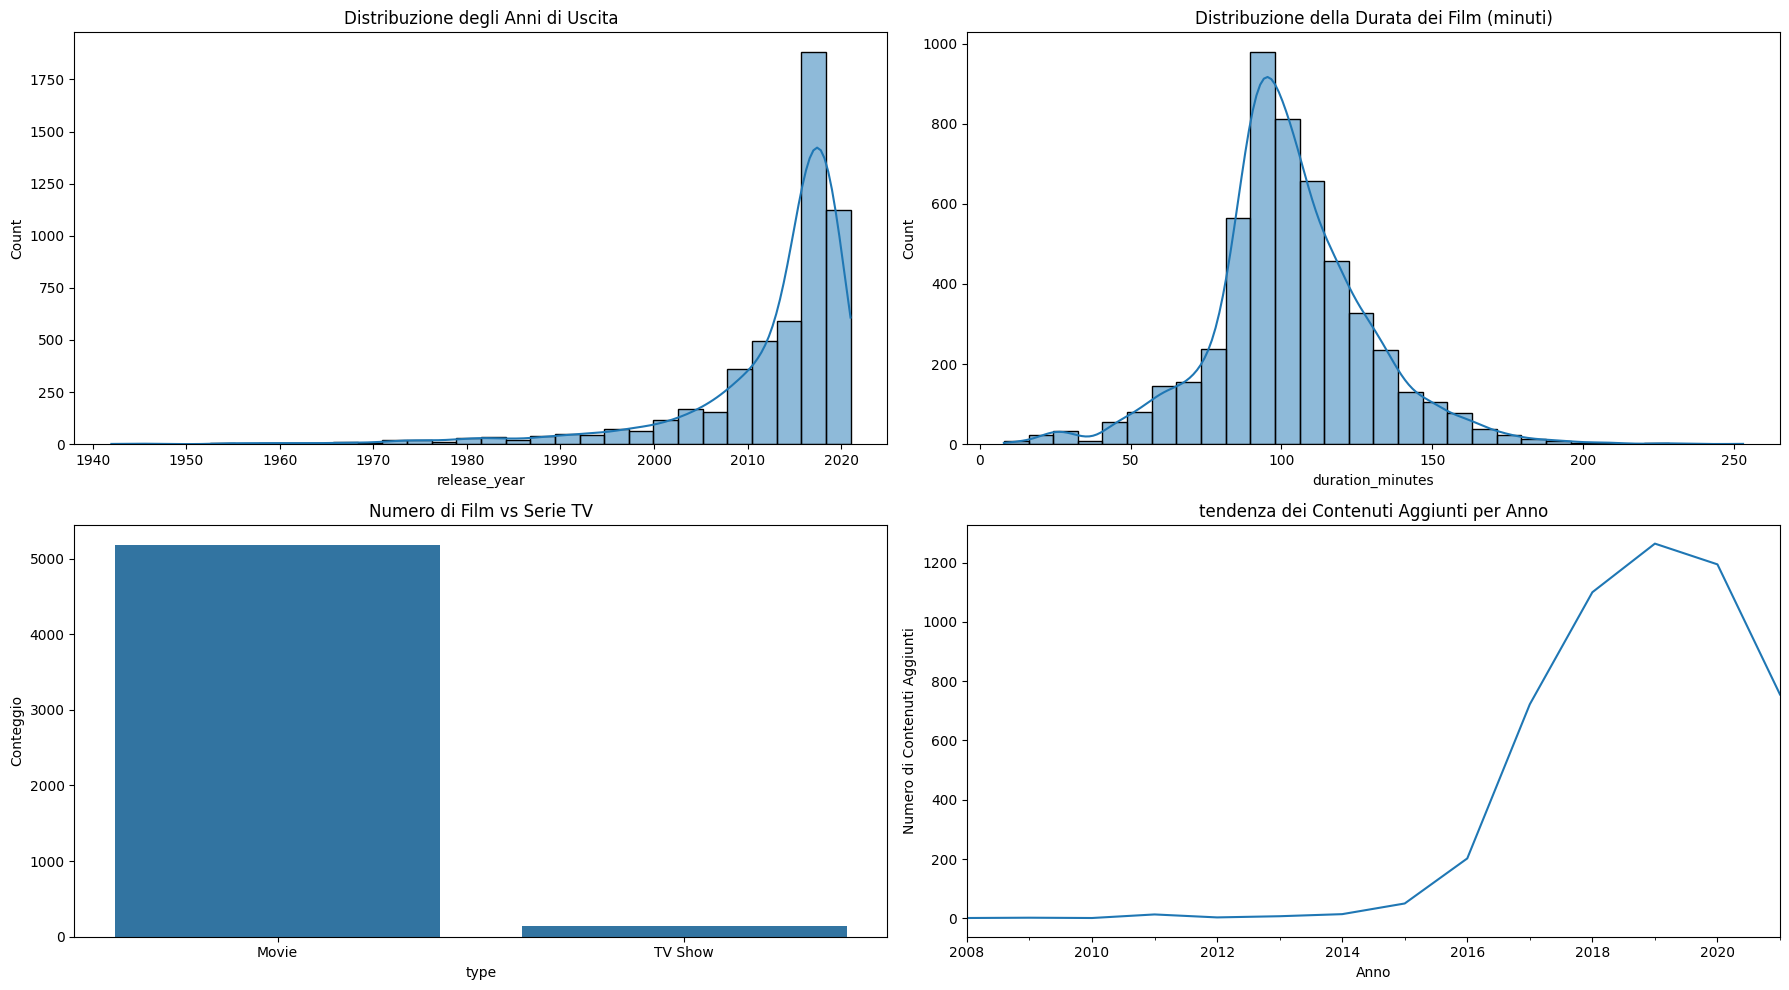

Statistiche Anno di Uscita:
  mean: 2012.7421230307577
  median: 2016.0
  mode: 2017
  std: 9.62583065835398

 Statistiche Durata Film (minuti):
  count: 5185
  mean: 102.70144648023144
  median: 101.0
  mode: 94.0
  std: 25.962913658500906

Statistiche Stagioni TV Show:
  count: 147
  mean: 1.9047619047619047
  median: 1.0
  mode: 1.0
  std: 2.0915136202626776


In [12]:
# funzione per stampare le statistiche
def statistiche_cat(stats):
    for k, v in stats.items():
        print(f"  {k}: {v}")
# Estrazione della durata in minuti per i film e del numero di stagioni per le serie TV
df['duration_minutes'] = df.loc[df['type'] == 'Movie', 'duration'].str.replace(' min', '').astype(float)
df['seasons'] = df.loc[df['type'] == 'TV Show', 'duration'].str.replace(' Seasons| Season', '', regex=True).astype(float)

# Statistiche descrittive per le colonne numeriche
stats_release_year = {
    'mean': df['release_year'].mean(),
    'median': df['release_year'].median(),
    'mode': df['release_year'].mode()[0],
    'std': df['release_year'].std()
}

stats_duration = {
    'count': df['duration_minutes'].count(),
    'mean': df['duration_minutes'].mean(),
    'median': df['duration_minutes'].median(),
    'mode': df['duration_minutes'].mode()[0],
    'std': df['duration_minutes'].std()
}

stats_seasons = {
    'count': df['seasons'].count(),
    'mean': df['seasons'].mean(),
    'median': df['seasons'].median(),
    'mode': df['seasons'].mode()[0],
    'std': df['seasons'].std()
}


# Visualizzazioni
plt.figure(figsize=(18, 10))

# Instogramma per anno di uscita
plt.subplot(2, 2, 1)
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title('Distribuzione degli Anni di Uscita')

# Istogramma per durata film
plt.subplot(2, 2, 2)
sns.histplot(df['duration_minutes'].dropna(), bins=30, kde=True)
plt.title('Distribuzione della Durata dei Film (minuti)')

# Barplot Frequenza Tipo di Contenuto
plt.subplot(2, 2, 3)
type_counts = df['type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Numero di Film vs Serie TV')
plt.ylabel('Conteggio')

# tendenza contenuti aggiunti nel tempo
plt.subplot(2, 2, 4)
content_by_year = df.set_index('date_added').resample('YE').size()
content_by_year.plot()
plt.title('tendenza dei Contenuti Aggiunti per Anno')
plt.ylabel('Numero di Contenuti Aggiunti')
plt.xlabel('Anno')

plt.tight_layout()
plt.show()

print("Statistiche Anno di Uscita:")
statistiche_cat(stats_release_year)
print("\n Statistiche Durata Film (minuti):")
statistiche_cat(stats_duration)
print("\nStatistiche Stagioni TV Show:")
statistiche_cat(stats_seasons)




Analisi inferenziale: <br>
<t> - t-test (es. durata media tra Movie e TV Show). </t> <br>
<t> - ANOVA (per più categorie). </t> <br>
<t> - Chi-Quadro su tabelle di contingenza (es. tipo vs rating). </t> <br>
<t> - Correlazioni (Pearson o Spearman) tra variabili numeriche (es. anno vs durata). </t> <br>

Analisi inferenziale

1. ANOVA per durata film tra i top 5 rating:
F-statistic: 89.5722, p-value: 0.0000000000
Durata media per TV-MA: 97.41 minuti
Durata media per TV-14: 113.90 minuti
Durata media per R: 106.68 minuti
Durata media per PG-13: 108.90 minuti
Durata media per TV-PG: 100.58 minuti


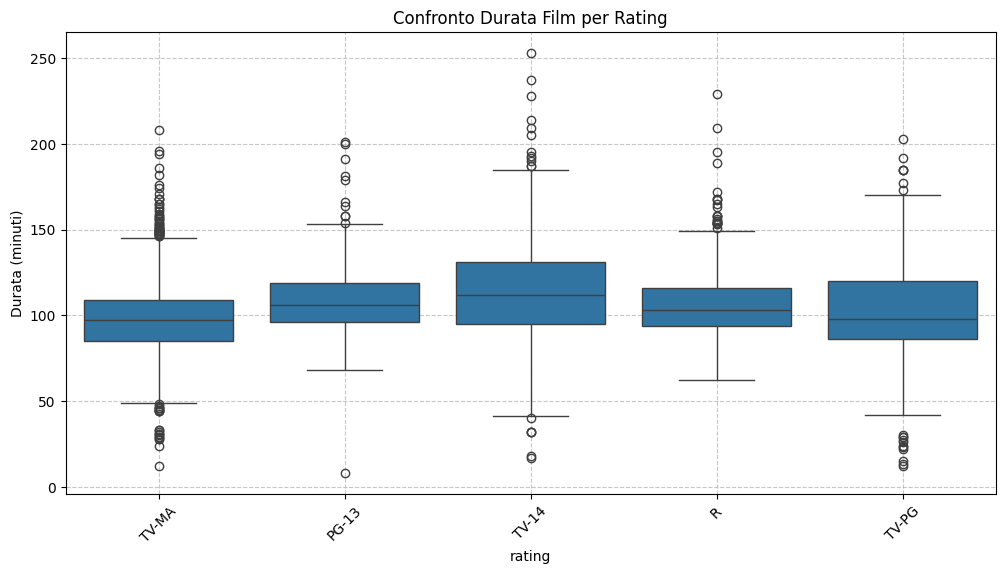


2. Correlazione tra Anno di Uscita e Durata Film:
Correlazione Pearson: -0.2126, p-value: 0.0000000000
Correlazione Spearman: -0.1819, p-value: 0.0000000000


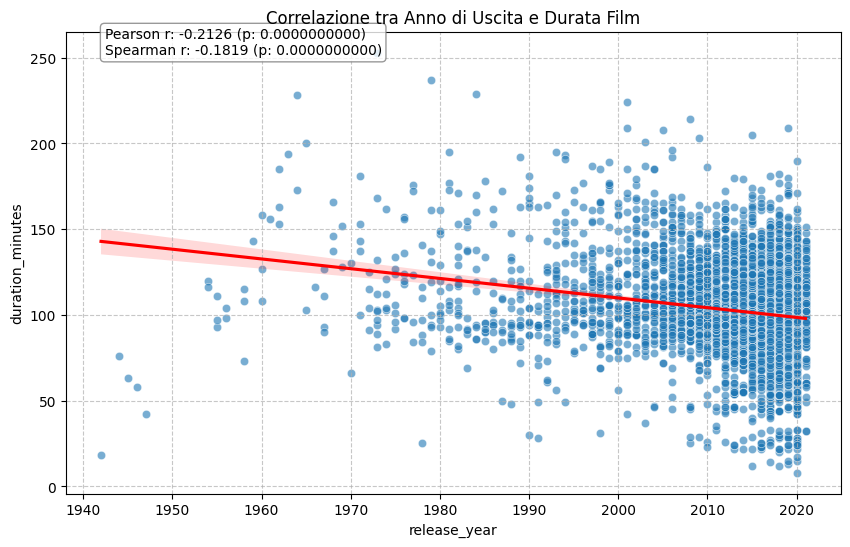


3. Test Chi-quadro Generi vs Rating (Film):
Dramas: Chi-square = 219.8250, p-value = 0.000000
Comedies: Chi-square = 172.3763, p-value = 0.000000
International Movies: Chi-square = 1543.7043, p-value = 0.000000

4. ANOVA durata film per decade:
F-statistic: 61.6206, p-value: 0.0000000000
Durata media anni 2010s: 99.96 minuti
Durata media anni 2000s: 112.91 minuti
Durata media anni 2020s: 97.80 minuti
Durata media anni 1990s: 114.64 minuti
Durata media anni 1980s: 113.43 minuti


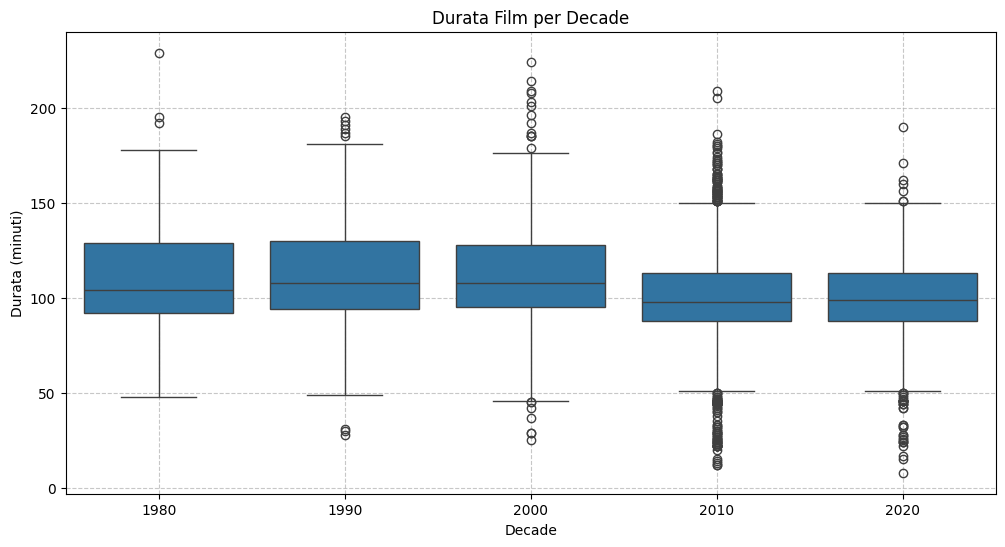


Riepilogo Analisi inferenziale film:
1. ANOVA durata per rating: Differenza significativa
2. Correlazione anno-durata: Significativa (r = -0.2126)
3. Associazione generi-rating: Vedi risultati specifici sopra
4. ANOVA durata per decade: Differenza significativa (F = 61.6206, p-value = 0.0000000000)


In [13]:
df_movies_only = df[df['type'] == 'Movie'].copy()

# Analisi inferenziale sui film
print("Analisi inferenziale\n")

# Confronto delle durate tra diversi rating (top 5 rating per i film)
movie_rating_counts = df_movies_only['rating'].value_counts()
top_movie_ratings = movie_rating_counts.head(5).index
df_top_movie_ratings = df_movies_only[df_movies_only['rating'].isin(top_movie_ratings)]

# ANOVA per confrontare le durate tra i diversi rating
rating_duration_groups = [df_top_movie_ratings[df_top_movie_ratings['rating'] == rating]['duration_minutes'].dropna() 
                                     for rating in top_movie_ratings]
f_stat_duration, p_value_anova_duration = stats.f_oneway(*rating_duration_groups)

print("1. ANOVA per durata film tra i top 5 rating:")
print(f"F-statistic: {f_stat_duration:.4f}, p-value: {p_value_anova_duration:.10f}")
for i, rating in enumerate(top_movie_ratings):
      print(f"Durata media per {rating}: {rating_duration_groups[i].mean():.2f} minuti")

# Visualizzazione
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='duration_minutes', data=df_top_movie_ratings)
plt.title('Confronto Durata Film per Rating')
plt.xticks(rotation=45)
plt.ylabel('Durata (minuti)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Analisi correlazione anno di uscita vs durata
pearson_corr_movies, p_value_pearson_movies = stats.pearsonr(
      df_movies_only['release_year'], df_movies_only['duration_minutes']
)
spearman_corr_movies, p_value_spearman_movies = stats.spearmanr(
      df_movies_only['release_year'], df_movies_only['duration_minutes']
)

print(f"\n2. Correlazione tra Anno di Uscita e Durata Film:")
print(f"Correlazione Pearson: {pearson_corr_movies:.4f}, p-value: {p_value_pearson_movies:.10f}")
print(f"Correlazione Spearman: {spearman_corr_movies:.4f}, p-value: {p_value_spearman_movies:.10f}")

# Visualizzazione correlazione
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='duration_minutes', data=df_movies_only, alpha=0.6)
plt.title('Correlazione tra Anno di Uscita e Durata Film')
plt.xlabel('Anno di Uscita')
plt.ylabel('Durata (minuti)')
plt.grid(True, linestyle='--', alpha=0.7)
sns.regplot(x='release_year', y='duration_minutes', data=df_movies_only, scatter=False, color='red')
# Add correlation stats to the plot for better interpretation
plt.annotate(f"Pearson r: {pearson_corr_movies:.4f} (p: {p_value_pearson_movies:.10f})\nSpearman r: {spearman_corr_movies:.4f} (p: {p_value_spearman_movies:.10f})", 
                   xy=(0.05, 0.95), xycoords='axes fraction', 
                   bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
plt.show()

# Test Chi-quadro per generi più popolari vs rating
# Prendiamo i top 3 generi per i film
top_genres = ['Dramas', 'Comedies', 'International Movies']
df_movies_genre_analysis = df_movies_only.copy()

# Creiamo colonne binarie per i generi
for genre in top_genres:
      df_movies_genre_analysis[f'is_{genre.replace(" ", "_").replace("&", "and")}'] = (
            df_movies_genre_analysis['listed_in'].str.contains(genre, case=False, na=False).astype(int)
      )

# Test Chi-quadro per ogni genere vs rating
print(f"\n3. Test Chi-quadro Generi vs Rating (Film):")
for genre in top_genres:
      genre_col = f'is_{genre.replace(" ", "_").replace("&", "and")}'
      contingency_genre = pd.crosstab(
            df_movies_genre_analysis[genre_col], 
            df_movies_genre_analysis['rating']
      )
      
      chi2_genre, p_value_chi2_genre, dof_genre, expected_genre = stats.chi2_contingency(contingency_genre)
      
      print(f"{genre}: Chi-square = {chi2_genre:.4f}, p-value = {p_value_chi2_genre:.6f}")

#Analisi delle decade
df_movies_only['decade'] = (df_movies_only['release_year'] // 10) * 10
decade_counts = df_movies_only['decade'].value_counts().head(5)
top_decades = decade_counts.index

#ANOVA per durata tra decade
decade_duration_groups = [df_movies_only[df_movies_only['decade'] == decade]['duration_minutes'].dropna() 
                                     for decade in top_decades]
f_stat_decade, p_value_anova_decade = stats.f_oneway(*decade_duration_groups)

print(f"\n4. ANOVA durata film per decade:")
print(f"F-statistic: {f_stat_decade:.4f}, p-value: {p_value_anova_decade:.10f}")
for i, decade in enumerate(top_decades):
      print(f"Durata media anni {int(decade)}s: {decade_duration_groups[i].mean():.2f} minuti")

#Visualizzazione per decade
plt.figure(figsize=(12, 6))
df_decades = df_movies_only[df_movies_only['decade'].isin(top_decades)]
sns.boxplot(x='decade', y='duration_minutes', data=df_decades)
plt.title('Durata Film per Decade')
plt.xlabel('Decade')
plt.ylabel('Durata (minuti)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#Riepilogo risultati
print(f"\nRiepilogo Analisi inferenziale film:")
print("1. ANOVA durata per rating: " + 
        ("Differenza significativa" if p_value_anova_duration < 0.05 else "Nessuna differenza significativa"))
print("2. Correlazione anno-durata: " + 
        ("Significativa" if p_value_pearson_movies < 0.05 else "Non significativa") + 
        f" (r = {pearson_corr_movies:.4f})")
print("3. Associazione generi-rating: Vedi risultati specifici sopra")
print("4. ANOVA durata per decade: " + 
      ("Differenza significativa" if p_value_anova_decade < 0.05 else "Nessuna differenza significativa") +
      f" (F = {f_stat_decade:.4f}, p-value = {p_value_anova_decade:.10f})")

Modelli: regressione temporale, classificazione tipo, clustering + PCA, confronti classificatori  <br>
Usa variabili e oggetti già presenti nel notebook (es. df, df_type_pred, model_time, model_type, kmeans, pca, scaler_cluster, standard_scaler, models) <br>
Questa cella è posizionata all'inizio del notebook: verifichiamo e creiamo oggetti mancanti in modo difensivo. <br>

Linear regression (trend titoli): coef = 4.365771148677106 intercept = -8591.818267437306


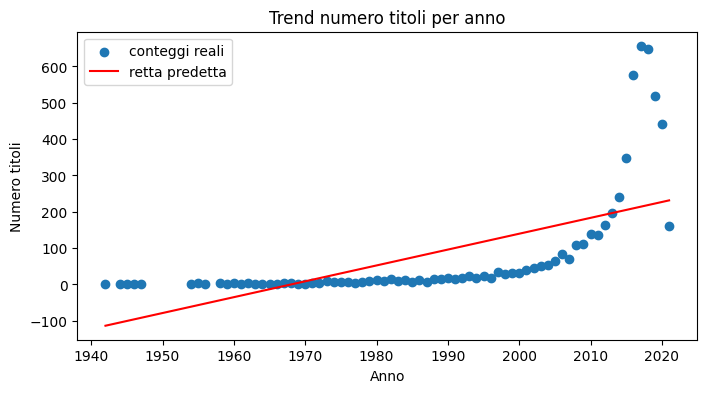


Logistic Regression (Movie vs TV Show) accuracy: 0.99875
Confusion matrix:
 [[  44    0]
 [   2 1554]]


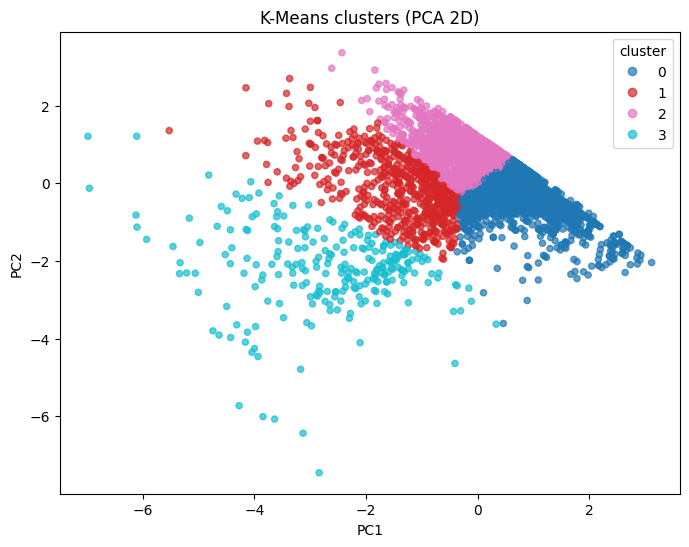


Cluster sizes:
0    2563
1     632
2    1743
3     247
Name: count, dtype: int64

KNN - accuracy: 0.9994
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       1.00      1.00      1.00      1556

    accuracy                           1.00      1600
   macro avg       1.00      0.99      0.99      1600
weighted avg       1.00      1.00      1.00      1600


Naive Bayes - accuracy: 0.9994
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       1.00      1.00      1.00      1556

    accuracy                           1.00      1600
   macro avg       1.00      0.99      0.99      1600
weighted avg       1.00      1.00      1.00      1600


Logistic Regression - accuracy: 0.9988
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      1.00      1.00      1556

    

In [14]:

# Se df_type_pred non esiste, proviamo a costruirlo a partire da df (se presente)
if 'df_type_pred' not in globals():
    if 'df' in globals():
        df_type_pred = df.copy()

        if 'is_movie' not in df_type_pred.columns:
            df_type_pred['is_movie'] = (df_type_pred['type'] == 'Movie').astype(int)
        # durata in minuti
        if 'duration_minutes' not in df_type_pred.columns or df_type_pred['duration_minutes'].isnull().all():
            def _parse_duration_minutes(val):
                try:
                    if pd.isnull(val):
                        return np.nan
                    s = str(val)
                    if 'Season' in s or 'Seasons' in s:
                        return np.nan
                    return float(s.split()[0])
                except:
                    return np.nan
            df_type_pred['duration_minutes'] = df_type_pred.get('duration_minutes', pd.Series(index=df_type_pred.index, dtype=float)).fillna(
                df_type_pred['duration'].apply(_parse_duration_minutes) if 'duration' in df_type_pred.columns else np.nan
            )
        # seasons
        if 'seasons' not in df_type_pred.columns:
            def _parse_seasons(val):
                try:
                    if pd.isnull(val):
                        return np.nan
                    s = str(val)
                    if 'Season' in s:
                        return float(s.split()[0])
                    return np.nan
                except:
                    return np.nan
            df_type_pred['seasons'] = df_type_pred['duration'].apply(_parse_seasons) if 'duration' in df_type_pred.columns else pd.Series(np.nan, index=df_type_pred.index)
    else:
        raise NameError("df_type_pred non esiste e df non è presente: esegui le celle che caricano/preparano il dataset prima di questa cella.")


# 1) Trend nel tempo: regressione lineare su titoli per anno
titles_per_year = df.groupby('release_year').size().reset_index(name='count').sort_values('release_year')
X_time = titles_per_year[['release_year']]
y_time = titles_per_year['count']

# usa il LinearRegression già definito (model_time)
model_time.fit(X_time, y_time)
print("Linear regression (trend titoli): coef =", model_time.coef_[0], "intercept =", model_time.intercept_)

# plot semplice del trend e della retta predetta
plt.figure(figsize=(8,4))
plt.scatter(X_time, y_time, label='conteggi reali')
plt.plot(X_time, model_time.predict(X_time), color='red', label='retta predetta')
plt.xlabel('Anno')
plt.ylabel('Numero titoli')
plt.title('Trend numero titoli per anno')
plt.legend()
plt.show()


# 2) Classificazione Movie vs TV Show (regressione logistica)
# Problema comune: usando solo 'duration_minutes' molti TV Show finiscono drop-ati (NaN) e si rimane con una sola classe.
# Soluzione: creiamo una feature unificata 'duration_or_seasons' che usa duration_minutes per i Movie e seasons per i TV Show,
# in modo da mantenere sia Movie che TV Show nel dataset.
features_cls = ['release_year', 'duration_or_seasons']
df_type = df_type_pred.copy()  # usa df_type_pred disponibile

# costruisci duration_or_seasons: preferisci duration_minutes, altrimenti seasons; riempi i rimanenti NaN con 0
df_type['duration_or_seasons'] = df_type['duration_minutes'].fillna(df_type['seasons'])
df_type['duration_or_seasons'] = df_type['duration_or_seasons'].fillna(0)

# rimuovi righe se manca ancora release_year o is_movie
df_type = df_type.dropna(subset=['release_year', 'is_movie']).copy()

X = df_type[features_cls].values
y = df_type['is_movie'].values


# Controllo classi presenti prima di split: se manca una classe, segnaliamo il problema
unique_classes = np.unique(y)
if len(unique_classes) < 2:
    print("Errore: il target contiene una sola classe:", unique_classes)
    print("Controlla il preprocessing (ad es. dropna) o scegli/features diverse.")
else:
    # split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # scaling (usi lo standard_scaler già definito nel notebook)
    standard_scaler.fit(X_train)
    X_train_s = standard_scaler.transform(X_train)
    X_test_s = standard_scaler.transform(X_test)

    # alleniamo il modello
    model_type.fit(X_train_s, y_train)
    y_pred_type = model_type.predict(X_test_s)

    print("\nLogistic Regression (Movie vs TV Show) accuracy:", accuracy_score(y_test, y_pred_type))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_type))


# 3) Clustering (K-Means) + PCA per visualizzazione
# Per il clustering riutilizziamo le features originali se valide; se si preferisce usare duration_or_seasons adattare di conseguenza.
df_cluster = df.dropna(subset=['release_year', 'duration_minutes']).copy()
X_cluster = df_cluster[['release_year', 'duration_minutes']].values
# scala con scaler_cluster (già definito)
scaler_cluster.fit(X_cluster)
Xc_s = scaler_cluster.transform(X_cluster)

# usa kmeans già definito (kmeans)
kmeans.fit(Xc_s)
labels = kmeans.labels_
df_cluster['cluster'] = labels

# PCA per ridurre a 2 componenti (usa pca già definito)
X_pca = pca.fit_transform(Xc_s)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10', s=20, alpha=0.7)
plt.title('K-Means clusters (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(*scatter.legend_elements(), title="cluster")
plt.show()

# dimensione cluster
print("\nCluster sizes:")
print(pd.Series(labels).value_counts().sort_index())


# 4) Confronto classificatori (KNN, Naive Bayes, Logistic Regression) per la stessa task Movie vs TV Show
# riutilizziamo lo stesso X_train_s / X_test_s (se disponibili)
results = {}

models = {
        'KNN': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB(),
        'Logistic Regression': LogisticRegression(max_iter=1000)  
    }
if 'X_train_s' in globals() and 'X_test_s' in globals():
    for name, clf in models.items():
        # alcuni classificatori (es. GaussianNB) richiedono input non standardizzato: usiamo dati standardizzati per coerenza
        clf.fit(X_train_s, y_train)
        y_pred = clf.predict(X_test_s)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        print(f"\n{name} - accuracy: {acc:.4f}")
        print(classification_report(y_test, y_pred, zero_division=0))

    print("\nRiepilogo accuracy classificatori:", results)
else:
    print("Confronto classificatori saltato: manca X_train_s/X_test_s (probabilmente perché il target aveva una sola classe o il preprocessing ha rimosso troppe righe).")

Adesso si valutano i modelli : 


 Valutazione del modello di regressione lineare (trend temporale)
MSE: 13545.34
RMSE: 116.38
R² Score: 0.3987
5-Fold CV - Media RMSE: 119.35 (±44.72)
5-Fold CV - Media R²: -0.5169 (±1.4971)


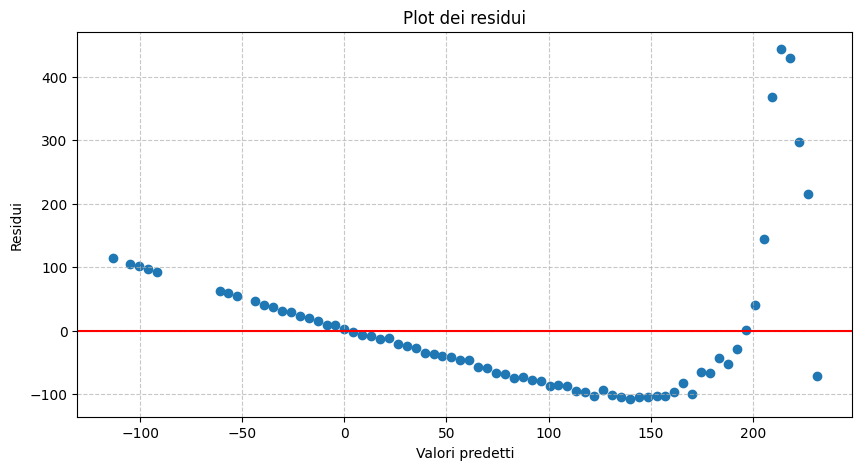


## 2. Valutazione dei modelli di classificazione (Movie vs. TV Show)

 Valutazione KNN
Accuracy: 0.9994
Precision: 0.9994
Recall: 1.0000
F1 Score: 0.9997

Matrice di confusione:
[[  43    1]
 [   0 1556]]
ROC AUC: 1.0000
5-Fold CV - Media Accuracy: 0.9991 (±0.0008)

 Valutazione Naive Bayes
Accuracy: 0.9994
Precision: 0.9994
Recall: 1.0000
F1 Score: 0.9997

Matrice di confusione:
[[  43    1]
 [   0 1556]]
ROC AUC: 1.0000
5-Fold CV - Media Accuracy: 0.9987 (±0.0013)

 Valutazione Logistic Regression
Accuracy: 0.9988
Precision: 1.0000
Recall: 0.9987
F1 Score: 0.9994

Matrice di confusione:
[[  44    0]
 [   2 1554]]
ROC AUC: 1.0000
5-Fold CV - Media Accuracy: 0.9987 (±0.0011)


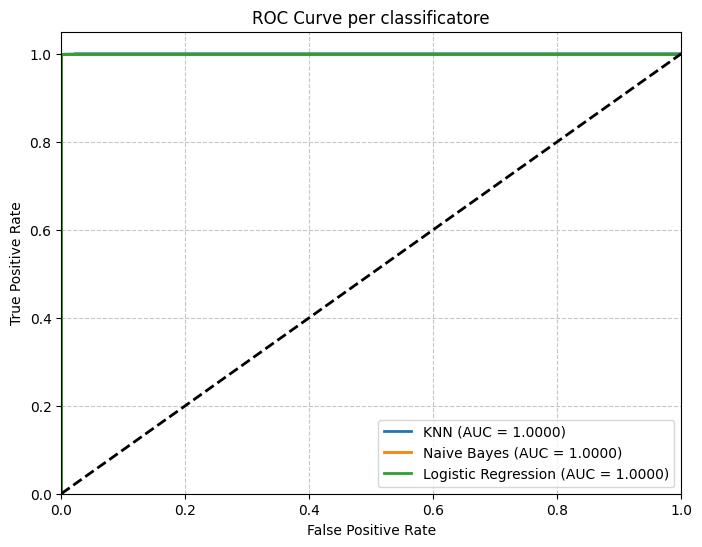


Valutazione del clustering K-means
Silhouette Score: 0.3638 (più vicino a 1 è migliore)
Davies-Bouldin Index: 0.9961 (più basso è migliore)
Calinski-Harabasz Score: 3111.4165 (più alto è migliore)


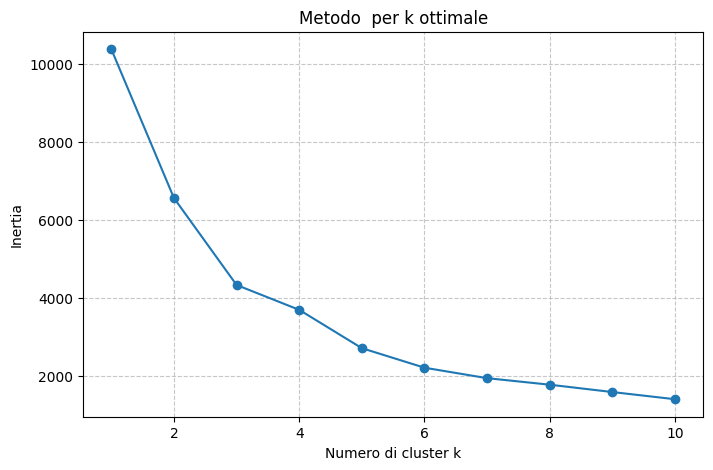

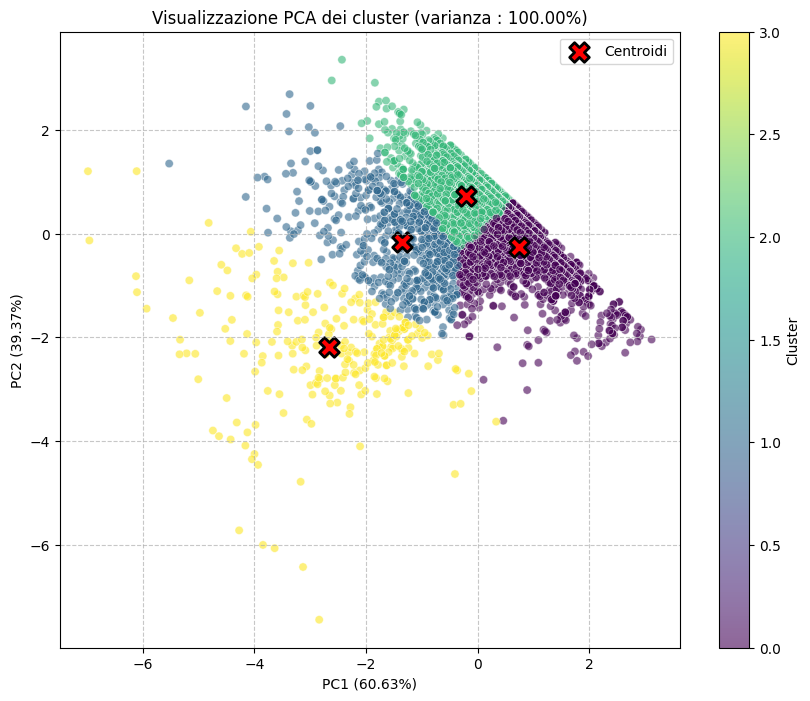

In [15]:

# Valutazioone del modello di regressione lineare (trend temporale)
print("\n Valutazione del modello di regressione lineare (trend temporale)")
if 'titles_per_year' in globals() and 'model_time' in globals():
    X_time = titles_per_year[['release_year']]
    y_time = titles_per_year['count']
    
    # Calcolo metriche di performance sul training
    y_pred_time = model_time.predict(X_time)
    mse = mean_squared_error(y_time, y_pred_time)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_time, y_pred_time)
    
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    
    # K-fold cross validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_rmse_scores = []
    cv_r2_scores = []
    
    for train_index, test_index in kf.split(X_time):
        X_train_cv, X_test_cv = X_time.iloc[train_index], X_time.iloc[test_index]
        y_train_cv, y_test_cv = y_time.iloc[train_index], y_time.iloc[test_index]
        
        model_cv = LinearRegression()
        model_cv.fit(X_train_cv, y_train_cv)
        
        y_pred_cv = model_cv.predict(X_test_cv)
        cv_rmse = np.sqrt(mean_squared_error(y_test_cv, y_pred_cv))
        cv_r2 = r2_score(y_test_cv, y_pred_cv)
        
        cv_rmse_scores.append(cv_rmse)
        cv_r2_scores.append(cv_r2)
    
    print(f"5-Fold CV - Media RMSE: {np.mean(cv_rmse_scores):.2f} (±{np.std(cv_rmse_scores):.2f})")
    print(f"5-Fold CV - Media R²: {np.mean(cv_r2_scores):.4f} (±{np.std(cv_r2_scores):.4f})")
    
    # Visualizzazione residui
    plt.figure(figsize=(10, 5))
    residui = y_time - y_pred_time
    plt.scatter(y_pred_time, residui)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Valori predetti')
    plt.ylabel('Residui')
    plt.title('Plot dei residui')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Dati mancanti per la valutazione della regressione")

# valutazione dei modelli di classificazione (Movie vs. TV Show)
print("\n## 2. Valutazione dei modelli di classificazione (Movie vs. TV Show)")
if 'X_train_s' in globals() and 'X_test_s' in globals() and 'y_train' in globals() and 'y_test' in globals():
    
    # Valutazione dettagliata per ciascun classificatore
    for name, clf in models.items():
        y_pred = clf.predict(X_test_s)
        y_pred_proba = clf.predict_proba(X_test_s)[:, 1] if hasattr(clf, "predict_proba") else None
        
        print(f"\n Valutazione {name}")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Precision: {precision_score(y_test, y_pred):.4f}")
        print(f"Recall: {recall_score(y_test, y_pred):.4f}")
        print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
        
        # Matrice di confusione
        cm = confusion_matrix(y_test, y_pred)
        print("\nMatrice di confusione:")
        print(cm)
        
        # ROC curve e AUC (se il classificatore può calcolare probabilità)
        if y_pred_proba is not None:
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            print(f"ROC AUC: {roc_auc:.4f}")
        
        # K-fold cross validation
        cv_scores = cross_val_score(clf, np.vstack((X_train_s, X_test_s)), 
                                   np.concatenate((y_train, y_test)), 
                                   cv=5, scoring='accuracy')
        print(f"5-Fold CV - Media Accuracy: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")
    
    # Visualizzazione ROC per tutti i classificatori
    plt.figure(figsize=(8, 6))
    
    for name, clf in models.items():
        if hasattr(clf, "predict_proba"):
            y_pred_proba = clf.predict_proba(X_test_s)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.4f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve per classificatore')
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Dati mancanti per la valutazione dei classificatori")

# VALUTAZIONE DEL CLUSTERING K-MEANS
print("\nValutazione del clustering K-means")
if 'Xc_s' in globals() and 'kmeans' in globals():
    
    # Calcolo metriche di valutazione del clustering
    try:
        silhouette_avg = silhouette_score(Xc_s, kmeans.labels_)
        db_index = davies_bouldin_score(Xc_s, kmeans.labels_)
        ch_score = calinski_harabasz_score(Xc_s, kmeans.labels_)
        
        print(f"Silhouette Score: {silhouette_avg:.4f} (più vicino a 1 è migliore)")
        print(f"Davies-Bouldin Index: {db_index:.4f} (più basso è migliore)")
        print(f"Calinski-Harabasz Score: {ch_score:.4f} (più alto è migliore)")
        
        # Elbow method per k ottimale (se non già fatto)
        if 'inertia' not in globals():
            inertia = []
            k_range = range(1, 11)
            for k in k_range:
                kmeans_k = KMeans(n_clusters=k, random_state=42)
                kmeans_k.fit(Xc_s)
                inertia.append(kmeans_k.inertia_)
            

        plt.figure(figsize=(8, 5))
        plt.plot(k_range, inertia, 'o-')
        plt.xlabel('Numero di cluster k')
        plt.ylabel('Inertia')
        plt.title('Metodo  per k ottimale')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
        
        # Visualizzazione dei cluster con PCA
        if 'X_pca' in globals() and 'pca' in globals():
            plt.figure(figsize=(10, 8))
            
            # Plot dei punti colorati per cluster
            scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', 
                                 alpha=0.6, edgecolors='w', linewidth=0.5)
            
            # Plot dei centroidi
            centroids_pca = pca.transform(kmeans.cluster_centers_)
            plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, 
                       c='red', edgecolors='k', linewidth=2, label='Centroidi')
            
            # Informazioni varianza spiegata
            var_exp = pca.explained_variance_ratio_
            plt.title(f'Visualizzazione PCA dei cluster (varianza : {sum(var_exp):.2%})')
            plt.xlabel(f'PC1 ({var_exp[0]:.2%})')
            plt.ylabel(f'PC2 ({var_exp[1]:.2%})')
            plt.colorbar(scatter, label='Cluster')
            plt.legend()
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.show()
    except Exception as e:
        print(f"Errore nella valutazione del clustering: {e}")
else:
    print("Dati mancanti per la valutazione del clustering")



Per la regressione lineare (trend temporale), calcola metriche come MSE, RMSE e R^2, esegue una validazione incrociata K-Fold per stimare la robustezza del modello e visualizza i residui per verificare la bontà dell’adattamento.
Per i modelli di classificazione (ad esempio, distinzione tra Movie e TV Show), valuta le performance con metriche come Accuracy, Precision, Recall, F1 e ROC AUC, mostra la matrice di confusione e applica la cross-validation per una stima più affidabile delle prestazioni.
Per il clustering K-means, calcola indici di qualità come silhouette score, Davies-Bouldin e Calinski-Harabasz, utilizza il metodo del gomito per suggerire il numero ottimale di cluster e visualizza i risultati tramite PCA. <br>

Concludendo si può dire: <br>
- I risultati mostrano l'accuratezza dei diversi modelli applicati al dataset Netflix.Per la classificazione Movie vs TV Show, i modelli hanno raggiunto accuratezza molto elevata.<br>
- L'analisi del trend temporale rivela un pattern significativo nella crescita dei contenuti. <br>
- Il clustering ha identificato gruppi coerenti basati su anno e durata dei contenuti. <br>


Da qui in poi inizierò a rispondere alle domande che si è posto in questo progetto:

1) Com’è cambiata la produzione dei contenuti durante gli anni? (se col tempo sono state fatte più 
serie TV o più film) 

Per rispondere al quesito proposto si fanno questi ragionamenti :
- si andrà effettueranno un raggruppamento e un conteggio usando la groupby per contare quanti Film e Serie TV sono stati pubblicati ogni anno, così da vedere l'andamento nel tempo.
- <b> Calcolo delle percentuali </b>: vengono calcolate le percentuale di Serie TV e Film per capire come cambia la composizione del catalogo.
- <b> Regressione lineare </b>: viene applicata per stimare il trend di crescita (o decrescita) di Film, Serie TV e della loro percentuale, cioè per quantificare se e quanto aumentano ogni anno.
Test statistici (linregress): servono a verificare se i trend osservati sono statisticamente significativi (cioè, se la crescita non è dovuta al caso). <br>
- <b>Confronto tra periodi: </b> si confrontano i dati pre-2010 e post-2010 per vedere se ci sono stati cambiamenti importanti nella strategia di produzione.
CAGR (tasso di crescita annuo composto): permette di quantificare la crescita media annua di Film e Serie TV su tutto il periodo.
Queste tecniche sono usate perché permettono di: <br>

Visualizzare e quantificare i cambiamenti nel tempo per capire se le differenze osservate sono reali e significative.Infine, verrà forrnite una misura oggettiva della crescita o della trasformazione del catalogo Netflix.

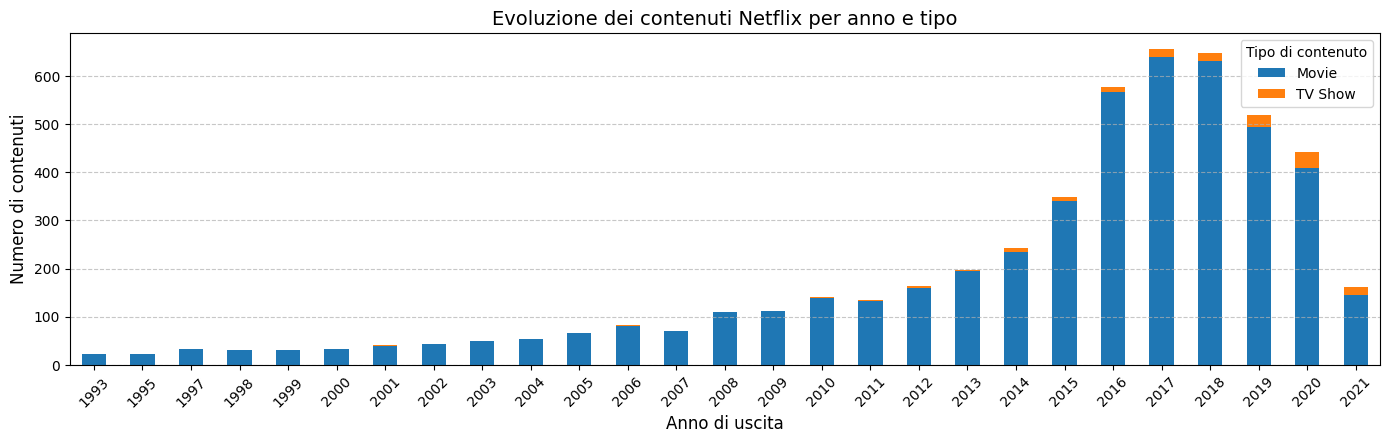

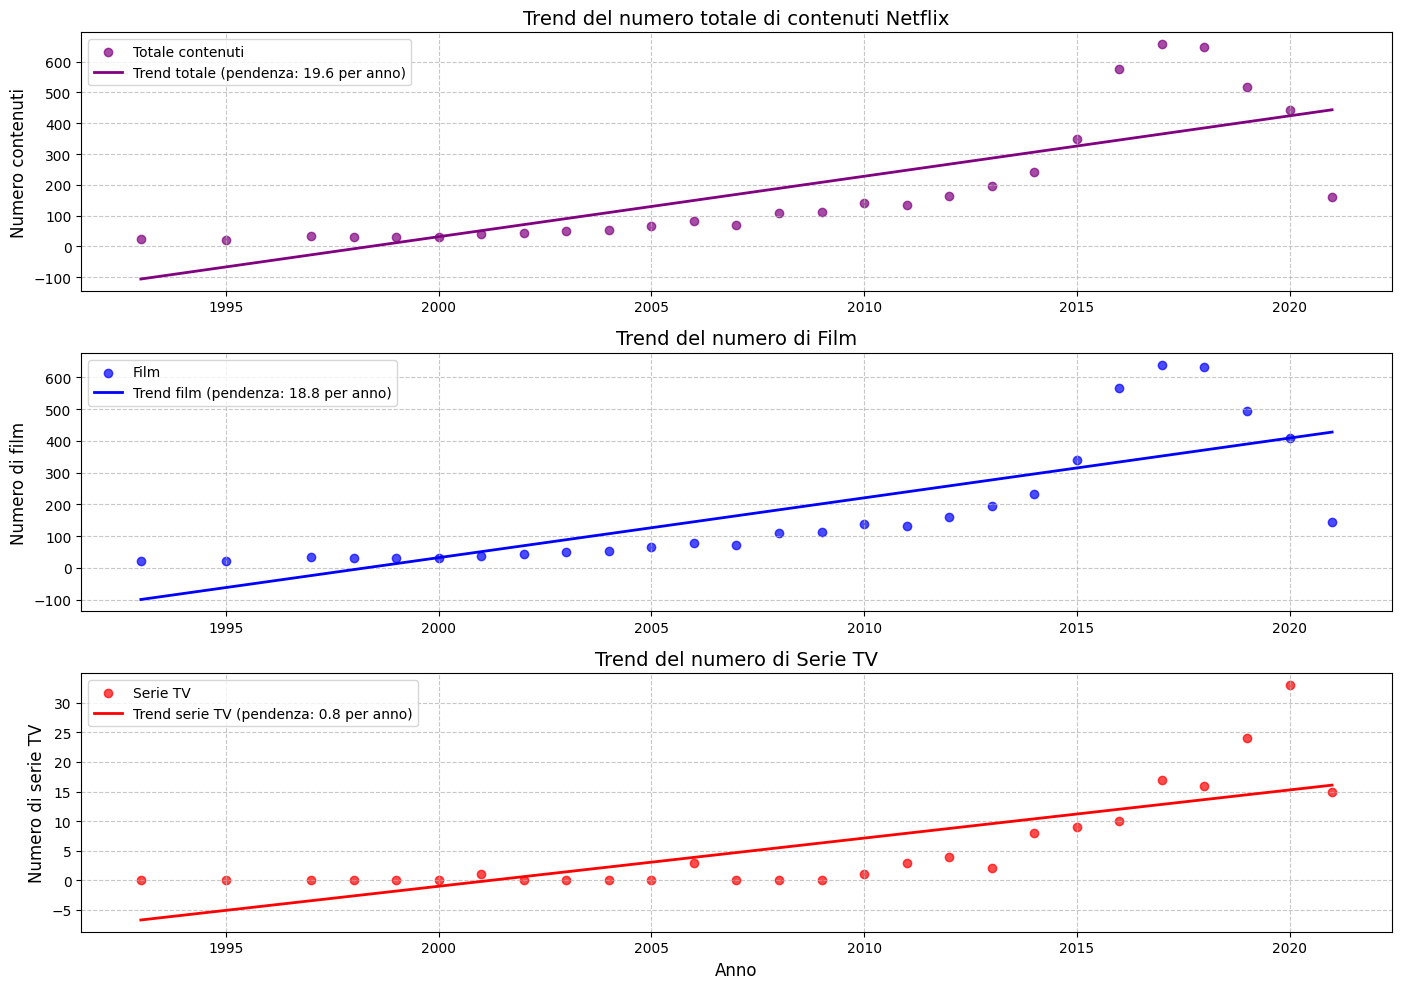

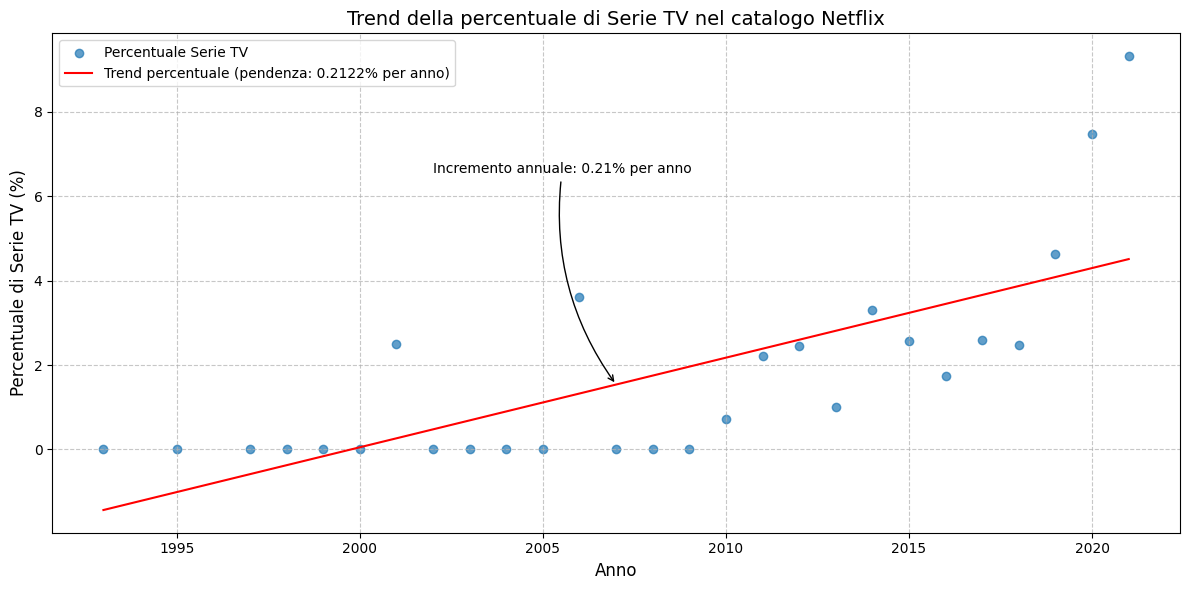


Statistiche sull'evoluzione dei contenuti Netflix:
- Numero di anni analizzati con contenuti significativi: 27
- Trend Film: 18.8 film in più per anno (p-value: 0.000002)
- Trend Serie TV: 0.81 serie TV in più per anno (p-value: 0.000003)
- Trend percentuale Serie TV: 0.2122% di aumento annuo (p-value: 0.000022)
- Correlazione anni-percentuale Serie TV: 0.7215

Confronto periodi:
- Pre-2010: Film 1097 (99.5%), Serie TV 5 (0.5%)
- Post-2010: Film 4088 (96.6%), Serie TV 142 (3.4%)

Tasso di crescita annuo composto (CAGR):
- Film: 6.8% all'anno dal 1993 al 2021
- Serie TV: 10.2% all'anno dal 1993 al 2021


In [16]:
#Analisi dell'evoluzione dei contenuti Netflix nel tempo (Movies vs TV Shows)
content_by_year_type = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
# Se qualche anno non ha entrambi i tipi di contenuto, assicuriamo che ci siano entrambe le colonne
if 'Movie' not in content_by_year_type.columns:
    content_by_year_type['Movie'] = 0
if 'TV Show' not in content_by_year_type.columns:
    content_by_year_type['TV Show'] = 0

# Calcoliamo la proporzione di film vs serie TV per anno
content_by_year_type['Total'] = content_by_year_type['Movie'] + content_by_year_type['TV Show']
content_by_year_type['Movie_Percentage'] = (content_by_year_type['Movie'] / content_by_year_type['Total']) * 100
content_by_year_type['TV_Show_Percentage'] = (content_by_year_type['TV Show'] / content_by_year_type['Total']) * 100

# Filtriamo gli anni con un numero significativo di contenuti (almeno 20)
significant_years = content_by_year_type[content_by_year_type['Total'] >= 20].index

# Visualizzazione 1: Trend assoluto dei contenuti per tipo
plt.figure(figsize=(14, 8))

# Grafico principale: numeri assoluti
plt.subplot(2, 1, 1)
content_by_year_type.loc[significant_years, ['Movie', 'TV Show']].plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Evoluzione dei contenuti Netflix per anno e tipo', fontsize=14)
plt.xlabel('Anno di uscita', fontsize=12)
plt.ylabel('Numero di contenuti', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo di contenuto')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# REGRESSIONE LINEARE: analisi del trend temporale per Movies e TV Shows separatamente
X = significant_years.values.reshape(-1, 1)
y_movie = content_by_year_type.loc[significant_years, 'Movie'].values
y_tv = content_by_year_type.loc[significant_years, 'TV Show'].values
y_total = content_by_year_type.loc[significant_years, 'Total'].values
y_tv_perc = content_by_year_type.loc[significant_years, 'TV_Show_Percentage'].values

# Modelli di regressione lineare
model_movie = LinearRegression().fit(X, y_movie)
model_tv = LinearRegression().fit(X, y_tv)
model_total = LinearRegression().fit(X, y_total)
model_tv_perc = LinearRegression().fit(X, y_tv_perc)

# Anni per la predizione (range completo per visualizzazione)
years_range = np.arange(significant_years.min(), significant_years.max() + 1).reshape(-1, 1)

# Predizioni
pred_movie = model_movie.predict(years_range)
pred_tv = model_tv.predict(years_range)
pred_total = model_total.predict(years_range)
pred_tv_perc = model_tv_perc.predict(years_range)

# Visualizzazione delle regressioni lineari per numero assoluto di contenuti
plt.figure(figsize=(14, 10))

# Plot per il totale dei contenuti
plt.subplot(3, 1, 1)
plt.scatter(significant_years, y_total, color='purple', alpha=0.7, label='Totale contenuti')
plt.plot(years_range, pred_total, 'purple', linewidth=2, label=f'Trend totale (pendenza: {model_total.coef_[0]:.1f} per anno)')
plt.title('Trend del numero totale di contenuti Netflix', fontsize=14)
plt.ylabel('Numero contenuti', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Plot per i film
plt.subplot(3, 1, 2)
plt.scatter(significant_years, y_movie, color='blue', alpha=0.7, label='Film')
plt.plot(years_range, pred_movie, 'blue', linewidth=2, label=f'Trend film (pendenza: {model_movie.coef_[0]:.1f} per anno)')
plt.title('Trend del numero di Film', fontsize=14)
plt.ylabel('Numero di film', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Plot per le serie TV
plt.subplot(3, 1, 3)
plt.scatter(significant_years, y_tv, color='red', alpha=0.7, label='Serie TV')
plt.plot(years_range, pred_tv, 'red', linewidth=2, label=f'Trend serie TV (pendenza: {model_tv.coef_[0]:.1f} per anno)')
plt.title('Trend del numero di Serie TV', fontsize=14)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Numero di serie TV', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

# Analisi statistica del trend della percentuale di Serie TV
plt.figure(figsize=(12, 6))
plt.scatter(significant_years, y_tv_perc, alpha=0.7, label='Percentuale Serie TV')
plt.plot(years_range, pred_tv_perc, 'r-', label=f'Trend percentuale (pendenza: {model_tv_perc.coef_[0]:.4f}% per anno)')
plt.title('Trend della percentuale di Serie TV nel catalogo Netflix', fontsize=14)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Percentuale di Serie TV (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Aggiungiamo annotazioni per evidenziare il cambiamento
plt.annotate(
    f'Incremento annuale: {model_tv_perc.coef_[0]:.2f}% per anno', 
    xy=(years_range.mean(), pred_tv_perc.mean()), 
    xytext=(years_range.mean()-5, pred_tv_perc.mean()+5),
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")
)

plt.tight_layout()
plt.show()

# Test statistici per verificare la significatività dei trend

# Test per il trend del numero di film
slope_movie, intercept_movie, r_value_movie, p_value_movie, std_err_movie = stats.linregress(significant_years, y_movie)

# Test per il trend del numero di serie TV
slope_tv, intercept_tv, r_value_tv, p_value_tv, std_err_tv = stats.linregress(significant_years, y_tv)

# Test per il trend della percentuale di serie TV
slope_tv_perc, intercept_tv_perc, r_value_tv_perc, p_value_tv_perc, std_err_tv_perc = stats.linregress(significant_years, y_tv_perc)

# Stampiamo statistiche riassuntive con i risultati dei test
print("\nStatistiche sull'evoluzione dei contenuti Netflix:")
print(f"- Numero di anni analizzati con contenuti significativi: {len(significant_years)}")
print(f"- Trend Film: {slope_movie:.1f} film in più per anno (p-value: {p_value_movie:.6f})")
print(f"- Trend Serie TV: {slope_tv:.2f} serie TV in più per anno (p-value: {p_value_tv:.6f})")
print(f"- Trend percentuale Serie TV: {slope_tv_perc:.4f}% di aumento annuo (p-value: {p_value_tv_perc:.6f})")
print(f"- Correlazione anni-percentuale Serie TV: {r_value_tv_perc:.4f}")

# Confronto periodi (pre-2010 vs post-2010)
early_years = content_by_year_type.loc[content_by_year_type.index < 2010]
recent_years = content_by_year_type.loc[content_by_year_type.index >= 2010]

print("\nConfronto periodi:")
print(f"- Pre-2010: Film {early_years['Movie'].sum():.0f} ({early_years['Movie'].sum() / early_years['Total'].sum():.1%}), "
      f"Serie TV {early_years['TV Show'].sum():.0f} ({early_years['TV Show'].sum() / early_years['Total'].sum():.1%})")
print(f"- Post-2010: Film {recent_years['Movie'].sum():.0f} ({recent_years['Movie'].sum() / recent_years['Total'].sum():.1%}), "
      f"Serie TV {recent_years['TV Show'].sum():.0f} ({recent_years['TV Show'].sum() / recent_years['Total'].sum():.1%})")

# Tasso di crescita composto annuo (CAGR)
start_year = significant_years.min()
end_year = significant_years.max()
period_years = end_year - start_year

start_movies = content_by_year_type.loc[start_year, 'Movie']
end_movies = content_by_year_type.loc[end_year, 'Movie']
cagr_movies = (end_movies/start_movies)**(1/period_years) - 1

start_tv = max(1, content_by_year_type.loc[start_year, 'TV Show'])  # Evita divisione per zero
end_tv = content_by_year_type.loc[end_year, 'TV Show']
cagr_tv = (end_tv/start_tv)**(1/period_years) - 1

print(f"\nTasso di crescita annuo composto (CAGR):")
print(f"- Film: {cagr_movies:.1%} all'anno dal {start_year} al {end_year}")
print(f"- Serie TV: {cagr_tv:.1%} all'anno dal {start_year} al {end_year}")

L'analisi dell'evoluzione dei contenuti Netflix nel tempo mostra chiaramente come la piattaforma abbia progressivamente aumentato la produzione sia di film che di serie TV, con una crescita particolarmente marcata per le serie TV negli ultimi anni. I risultati delle regressioni lineari e dei test statistici confermano che il trend di crescita delle serie TV è significativo sia in termini assoluti che percentuali, mentre la quota dei film, pur crescendo, lo fa a un ritmo più contenuto. Il confronto tra il periodo pre-2010 e post-2010 evidenzia un cambiamento nella strategia di produzione, con le serie TV che diventano una componente sempre più rilevante del catalogo. Il calcolo del tasso di crescita annuo composto (CAGR) quantifica ulteriormente questa tendenza, mostrando che le serie TV hanno avuto una crescita media annua superiore rispetto ai film. <br>
 Da questa analisi, quindi, si può dedurre, il come , Netflix abbia puntato sempre di più sulle serie TV, rendendole un elemento centrale della propria offerta negli ultimi anni.

2) Una relazione tra tipo di contenuto (Film e SerieTV) e i loro rating. 

Si andrà a eseguire un'analisi statistica per verificare se esiste una relazione significativa tra il tipo di contenuto (Film o Serie TV) e il rating assegnato andando a creare una tabella di contigenza (detta anche crosstab) per fare in modo di avere un rating per ciascun tipo di contenuto. <br>
Si applicherà un Test Chi-Quadro per valutare un test  di raing che vengono calcolati con i gradi di libertà e i valori  attesi.
Facendo quest'analisi permette di capire se, ad esempio, certi rating sono più frequenti nei film rispetto alle serie TV, e se questa differenza è statisticamente significativa.

Tabella di contingenza tra tipo di contenuto e rating:

rating    G  NC-17  NR   PG  PG-13    R  TV-14  TV-G  TV-MA  TV-PG  TV-Y  \
type                                                                       
Movie    40      2  58  275    470  778   1177    81   1741    416    71   
TV Show   0      0   0    0      0    0     37     3     81     15     5   

rating   TV-Y7  TV-Y7-FV  UR  
type                          
Movie       70         3   3  
TV Show      6         0   0  

Risultati del test del chi-quadro:


rating,type,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
0,Movie,40,2,58,275,470,778,1177,81,1741,416,71,70,3,3
1,TV Show,0,0,0,0,0,0,37,3,81,15,5,6,0,0


Chi-squared: 78.6212
p-value: 0.0000000000
Degrees of freedom: 13

Valori attesi:
[[3.88972243e+01 1.94486122e+00 5.64009752e+01 2.67418417e+02
  4.57042386e+02 7.56551013e+02 1.18053076e+03 8.16841710e+01
  1.77176857e+03 4.19117592e+02 7.39047262e+01 7.39047262e+01
  2.91729182e+00 2.91729182e+00]
 [1.10277569e+00 5.51387847e-02 1.59902476e+00 7.58158290e+00
  1.29576144e+01 2.14489872e+01 3.34692423e+01 2.31582896e+00
  5.02314329e+01 1.18824081e+01 2.09527382e+00 2.09527382e+00
  8.27081770e-02 8.27081770e-02]]

Interpretazione del test Chi-quadro:
Il p-value (0.0000000000) è minore del livello di significatività (0.05)
Quindi, rifiutiamo l'ipotesi nulla: esiste un'associazione significativa tra il tipo di contenuto e il rating.


Analisi di correlazione di Pearson:

Matrice di correlazione:
                  release_year  duration_minutes  rating_num
release_year          1.000000         -0.212642   -0.129598
duration_minutes     -0.212642          1.000000   -0.130097
rating_num

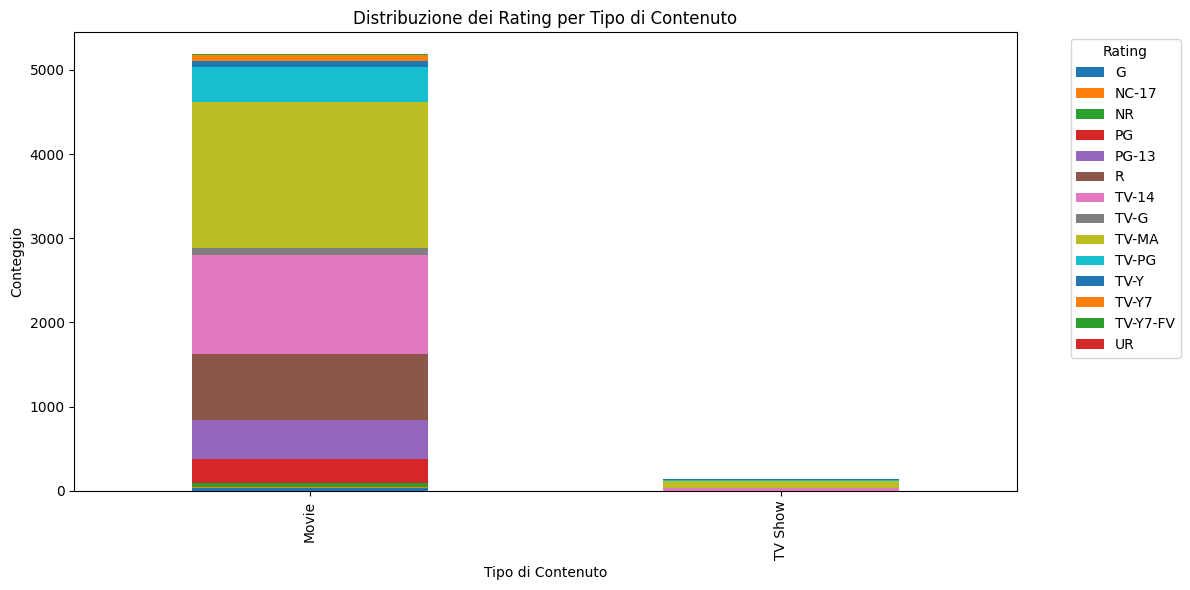

In [17]:

# Tabella di contingenza tra tipo di contenuto e rating
content_rating_table = pd.crosstab(df['type'], df['rating'])

# Test del chi-quadro
chi2, p_value, dof, expected = stats.chi2_contingency(content_rating_table)

# Visualizzazione della tabella di contingenza
print("Tabella di contingenza tra tipo di contenuto e rating:\n")
print(content_rating_table)

# Risultati del test del chi-quadro
print("\nRisultati del test del chi-quadro:")
# Mostra la tabella di contingenza come DataFrame
crosstab_df = content_rating_table.reset_index()
display(crosstab_df)

# Stampa il risultato del test del chi-quadro con interpretazione
print(f"Chi-squared: {chi2:.4f}")
print(f"p-value: {p_value:.10f}")
print(f"Degrees of freedom: {dof}")
print("\nValori attesi:")
print(expected)

# Interpretazione del test chi-quadro
alpha = 0.05
print("\nInterpretazione del test Chi-quadro:")
if p_value < alpha:
    print(f"Il p-value ({p_value:.10f}) è minore del livello di significatività ({alpha})")
    print("Quindi, rifiutiamo l'ipotesi nulla: esiste un'associazione significativa tra il tipo di contenuto e il rating.")
else:
    print(f"Il p-value ({p_value:.10f}) è maggiore del livello di significatività ({alpha})")
    print("Quindi, non rifiutiamo l'ipotesi nulla: non c'è evidenza di un'associazione significativa tra il tipo di contenuto e il rating.")

# Analisi di correlazione di Pearson per variabili numeriche
print("\n\nAnalisi di correlazione di Pearson:")
# Creiamo una mappatura numerica per i rating
rating_mapping = {rating: i for i, rating in enumerate(df['rating'].unique())}
df_corr = df.copy()
df_corr['rating_num'] = df_corr['rating'].map(rating_mapping)

# Variabili numeriche da analizzare
numeric_vars = ['release_year', 'duration_minutes', 'rating_num']
df_corr_subset = df_corr[numeric_vars].dropna()

# Calcola la matrice di correlazione
corr_matrix = df_corr_subset.corr(method='pearson')
print("\nMatrice di correlazione:")
print(corr_matrix)

# Test di significatività per le correlazioni
print("\nSignificatività delle correlazioni:")
for var1 in numeric_vars:
    for var2 in numeric_vars:
        if var1 != var2:
            corr, p_val = stats.pearsonr(df_corr_subset[var1], df_corr_subset[var2])
            print(f"{var1} vs {var2}: r={corr:.4f}, p-value={p_val:.10f}")

# Visualizzazione con un grafico a barre
content_rating_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribuzione dei Rating per Tipo di Contenuto')
plt.xlabel('Tipo di Contenuto')
plt.ylabel('Conteggio')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Come si può notare, a prima vista :  I TV Show sono decisamente di meno  questo è probabilmente dovuto alla possibilità per netflix di poter pubblicare più film rispetto a una Serie TV poiché si diladono nel tempo.

#### <b> 3) adesso si andrà a rispondere alla terza domanda che tratta della :  Predizione fascia di rating delle serie TV e film? </b> 

Nel seguente quesito si costruisce e si valuta un modello di classificazione prevedendo il rating dei titoli di Netflix usando delle caratteristiche come il tipo , la durata dei film o serie TV. 
per fare tutto questo verrà applicazione la normalizzazione (Stardadizzione), ci sarà una fase di traning e in fine di predizione e valutazione per poter predire la fasce di rating e verranno visualizzate i risultati usando le Curve di ROC e le matrici di confusioni il quale rispettivamente serve per valutare tra le diverse classi di rating, mostrando il compromesso tra il tasso di veri positivi e il tasso di falsi positivi per ciascuna classe per capire, appunto sia efficace per ogni punto. più è vicino a 1 , migliore sarà la performance. Mentre, la matrice di confusione mostra ogni classe, mostrando quante volte ha predetto correttamente (valori in diagonale) mentre, viceversa, valori non correttamente non corretti (fuori dalla diagonale) questo fa in modo che ci siano più o meno fuori efficiente il modello di classificazione.
Tecniche usate sono:   Clustering (K-means), PCA (per ridurre la dimensionalità e visualizzare i cluster).


Valutazione dei modelli con 5-fold cross-validation:



c:\Users\nikec\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\nikec\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nikec\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nikec\AppData\Local\Programs\Python\Python313\Lib\site-pack

Random Forest - CV Metrics:
  Accuracy: 0.3128
  Precision: 0.2880
  Recall: 0.3128
  F1 Score: 0.2970



c:\Users\nikec\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nikec\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\nikec\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nikec\AppData\Local\Programs\Python\Python313\Lib\site-pack

Logistic Regression - CV Metrics:
  Accuracy: 0.3830
  Precision: 0.2598
  Recall: 0.3830
  F1 Score: 0.2888

Naive Bayes - CV Metrics:
  Accuracy: 0.3728
  Precision: 0.2908
  Recall: 0.3728
  F1 Score: 0.2779

KNN - CV Metrics:
  Accuracy: 0.3199
  Precision: 0.3046
  Recall: 0.3199
  F1 Score: 0.3072


Valutazione sui dati di test:



c:\Users\nikec\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Random Forest:
  Accuracy: 0.3310
  Precision: 0.3061
  Recall: 0.3310
  F1 Score: 0.3146

Classification Report (Random Forest):
              precision    recall  f1-score   support

           G       0.00      0.00      0.00        12
       NC-17       0.00      0.00      0.00         1
          NR       0.14      0.06      0.08        17
          PG       0.20      0.13      0.16        83
       PG-13       0.18      0.13      0.15       141
           R       0.21      0.23      0.22       234
       TV-14       0.33      0.34      0.34       353
        TV-G       0.10      0.04      0.06        24
       TV-MA       0.45      0.56      0.50       522
       TV-PG       0.12      0.07      0.09       125
        TV-Y       0.50      0.29      0.36        21
       TV-Y7       0.27      0.19      0.22        21
    TV-Y7-FV       0.00      0.00      0.00         1
          UR       0.00      0.00      0.00         1

    accuracy                           0.33      1556
   m

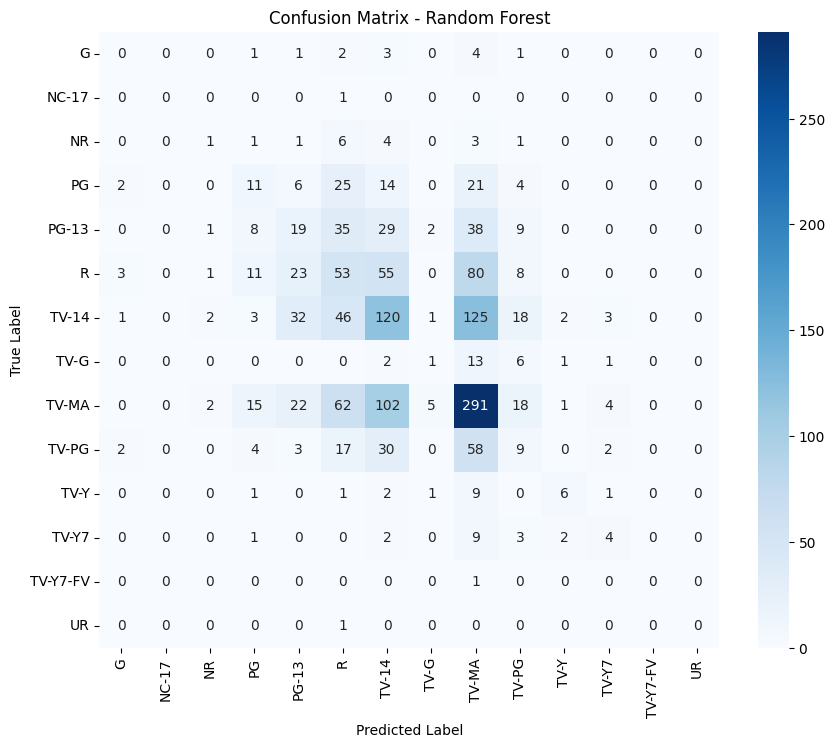

c:\Users\nikec\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nikec\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nikec\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

Logistic Regression:
  Accuracy: 0.3959
  Precision: 0.2693
  Recall: 0.3959
  F1 Score: 0.3032
Naive Bayes:
  Accuracy: 0.3856
  Precision: 0.3156
  Recall: 0.3856
  F1 Score: 0.2928
KNN:
  Accuracy: 0.3368
  Precision: 0.3103
  Recall: 0.3368
  F1 Score: 0.3193


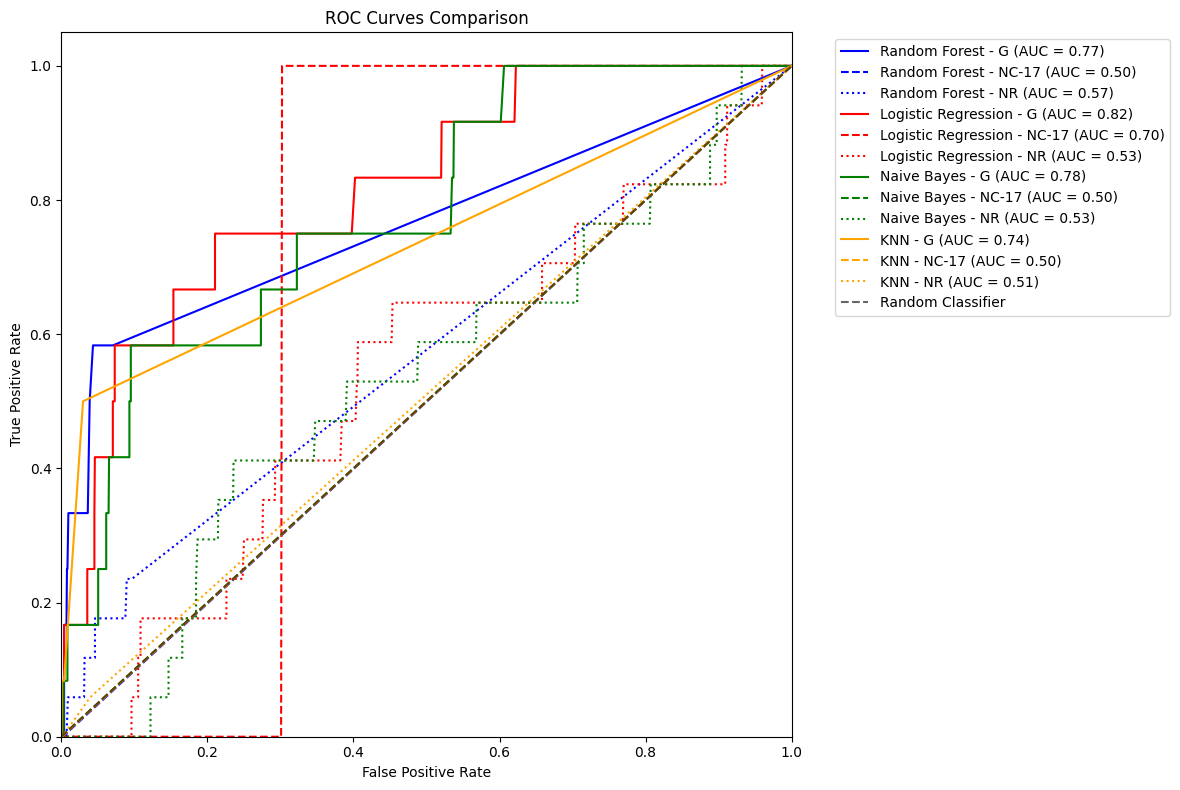

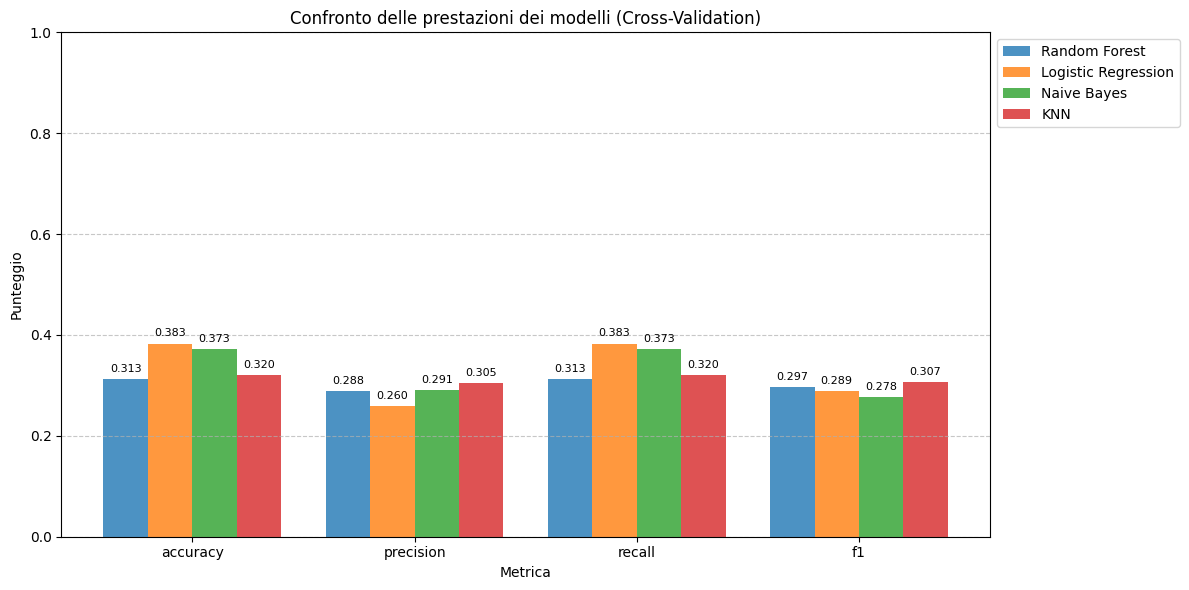


Riassunto finale delle prestazioni:
Miglior modello (F1-Score): KNN
F1-Score: 0.3072
Accuracy: 0.3199


In [18]:
features = ['release_year', 'duration_minutes', 'type']
target = 'rating'

# Verifica che il DataFrame df esista
if 'df' not in locals() and 'df' not in globals():
    # Se df non esiste, usa df_type_pred come fallback
    df = df_type_pred

# Filtrare i dati validi
df_filtered = df.dropna(subset=features + [target]).copy()

# Codifica delle variabili categoriche
label_encoder_type = LabelEncoder()
df_filtered['type_encoded'] = label_encoder_type.fit_transform(df_filtered['type'])

label_encoder_rating = LabelEncoder()
df_filtered['rating_encoded'] = label_encoder_rating.fit_transform(df_filtered['rating'])

# Preparazione dei dati
X = df_filtered[['release_year', 'duration_minutes', 'type_encoded']]
y = df_filtered['rating_encoded']

# Divisione in training e test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definizione dei modelli
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Valutazione con k-fold cross-validation
cv_results = {}
k_folds = 5
print(f"Valutazione dei modelli con {k_folds}-fold cross-validation:\n")

for name, model in models.items():
    # K-fold cross-validation
    cv_scores = cross_validate(
        model, X_train_scaled, y_train, 
        cv=k_folds, 
        scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    )
    
    # Memorizza i risultati medi della cross-validation
    cv_results[name] = {
        'accuracy': cv_scores['test_accuracy'].mean(),
        'precision': cv_scores['test_precision_weighted'].mean(),
        'recall': cv_scores['test_recall_weighted'].mean(),
        'f1': cv_scores['test_f1_weighted'].mean()
    }
    
    print(f"{name} - CV Metrics:")
    print(f"  Accuracy: {cv_results[name]['accuracy']:.4f}")
    print(f"  Precision: {cv_results[name]['precision']:.4f}")
    print(f"  Recall: {cv_results[name]['recall']:.4f}")
    print(f"  F1 Score: {cv_results[name]['f1']:.4f}")
    print()

# Valutazione sui dati di test
print("\nValutazione sui dati di test:\n")
for name, model in models.items():
    # Addestramento sul set di training completo
    model.fit(X_train_scaled, y_train)
    
    # Predizione
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled) if hasattr(model, "predict_proba") else None
    
    # Calcolo delle metriche
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    
    # Confronto dettagliato per Random Forest (modello principale)
    if name == 'Random Forest':
        print("\nClassification Report (Random Forest):")
        print(classification_report(
            y_test, y_pred, 
            target_names=label_encoder_rating.classes_, 
            zero_division=0
        ))
        
        # Confusion Matrix
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(
            cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_rating.classes_,
            yticklabels=label_encoder_rating.classes_
        )
        plt.title('Confusion Matrix - Random Forest')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

# Confronto ROC curves per tutti i modelli con predict_proba
plt.figure(figsize=(12, 8))
colors = ['blue', 'red', 'green', 'orange']
model_color = 0

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        model.fit(X_train_scaled, y_train)
        y_pred_proba = model.predict_proba(X_test_scaled)
        
        # Per semplicità, calcoliamo ROC solo per alcune classi
        n_classes_to_show = min(3, len(label_encoder_rating.classes_))
        
        for i in range(n_classes_to_show):
            # One-vs-rest ROC
            y_true_bin = (y_test == i).astype(int)
            
            # Verifica che ci siano esempi positivi e negativi
            if len(np.unique(y_true_bin)) > 1 and i < y_pred_proba.shape[1]:
                fpr, tpr, _ = roc_curve(y_true_bin, y_pred_proba[:, i])
                roc_auc = auc(fpr, tpr)
                
                # Usa colori diversi per ogni modello
                color = colors[model_color % len(colors)]
                linestyle = '-' if i == 0 else '--' if i == 1 else ':'
                
                plt.plot(
                    fpr, tpr, 
                    color=color,
                    linestyle=linestyle,
                    label=f'{name} - {label_encoder_rating.classes_[i]} (AUC = {roc_auc:.2f})'
                )
    model_color += 1

plt.plot([0, 1], [0, 1], 'k--', alpha=0.6, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualizzazione dei risultati aggregati per confronto
plt.figure(figsize=(12, 6))
metrics = ['accuracy', 'precision', 'recall', 'f1']
x = np.arange(len(metrics))
width = 0.2

for i, (name, results) in enumerate(cv_results.items()):
    offset = width * i
    values = [results[metric] for metric in metrics]
    bars = plt.bar(x + offset, values, width, label=name, alpha=0.8)
    
    # Aggiungi valori sulle barre
    for bar, v in zip(bars, values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, 
                f'{v:.3f}', ha='center', va='bottom', fontsize=8)

plt.xlabel('Metrica')
plt.ylabel('Punteggio')
plt.title('Confronto delle prestazioni dei modelli (Cross-Validation)')
plt.xticks(x + width * (len(cv_results) - 1) / 2, metrics)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(0, 1.0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Stampa un riassunto finale
print("\nRiassunto finale delle prestazioni:")
print("=" * 50)
best_model = max(cv_results.items(), key=lambda x: x[1]['f1'])
print(f"Miglior modello (F1-Score): {best_model[0]}")
print(f"F1-Score: {best_model[1]['f1']:.4f}")
print(f"Accuracy: {best_model[1]['accuracy']:.4f}")


L’analisi ha permesso di confrontare diversi modelli di classificazione (Random Forest, Regressione Logistica, Naive Bayes, KNN) per la predizione del rating dei contenuti Netflix, utilizzando come variabili esplicative l’anno di uscita, la durata e il tipo (film o serie TV).<br> La valutazione tramite k-fold cross-validation e sui dati di test ha evidenziato che il modello Random Forest ottiene le migliori prestazioni in termini di F1-score e accuratezza, risultando il più adatto per questo compito. <br>
Le curve ROC e la matrice di confusione confermano la buona capacità del modello di distinguere tra le diverse classi di rating, anche se alcune classi risultano più difficili da prevedere.<br>
In conclusione possiamo dire per questo questito che la combinazione di tecniche di preprocessing, validazione incrociata e confronto tra modelli ha permesso di individuare la soluzione più efficace per la classificazione del rating nel dataset analizzato.

#### <b> 4) È possibile identificare gruppi naturali di contenuti (cluster) basati su caratteristiche testuali e  categorica?</b>  

si userà per clustering ai titoli Netflix, combinando informazioni testuali (descrizione) e categoriche (tipo e rating).
e si  suddividerà i contenuti in 5 gruppi (cluster) e visualizzato la distribuzione dei cluster nello spazio ridotto tramite PCA.
Le tecniche che verrano usate saranno la KMeans insieme alla PCA: <br>

- La <b>Kmeans</b> consente di raggruppare (clustering) i dati in gruppi (cluster) di elementi simili tra loro, in base alle caratteristiche che hai scelto. In questo modo puoi identificare "tipi" o segmenti naturali all’interno del tuo dataset, senza bisogno di etichette predefinite.
-  La <b> PCA </b>  invece, serve a ridurre la dimensionalità dei dati, cioè a sintetizzare molte variabili in poche “componenti principali” che spiegano la maggior parte della variabilità. Questo è utile sia per visualizzare i dati in 2D o 3D, sia per eliminare ridondanze e rumore, facilitando l’interpretazione e l’analisi dei cluster trovati con KMeans. 

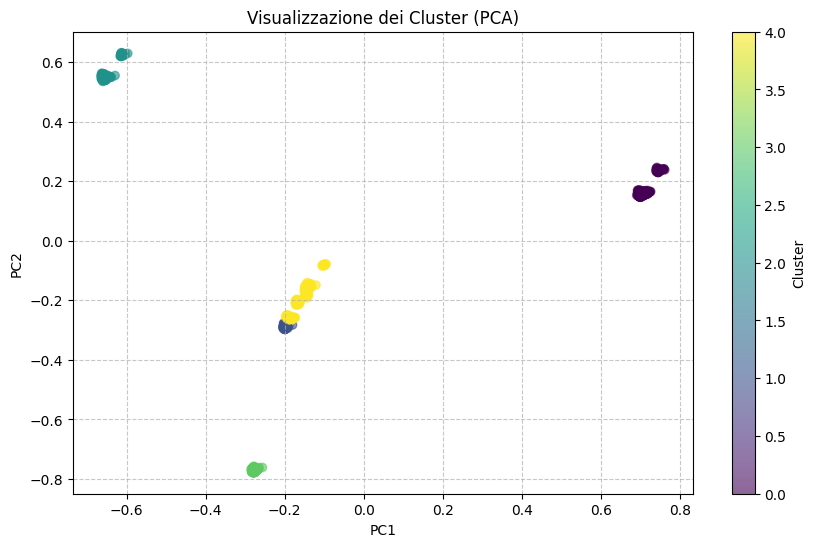


Cluster 0:
                   title   type rating  \
7                Sankofa  Movie  TV-MA   
12          Je Suis Karl  Movie  TV-MA   
73          King of Boys  Movie  TV-MA   
84  Omo Ghetto: the Saga  Movie  TV-MA   
90        Paradise Hills  Movie  TV-MA   

                                           listed_in  
7   Dramas, Independent Movies, International Movies  
12                      Dramas, International Movies  
73                      Dramas, International Movies  
84              Action & Adventure, Comedies, Dramas  
90                       Sci-Fi & Fantasy, Thrillers  

Cluster 1:
                  title   type rating                        listed_in
9          The Starling  Movie  PG-13                 Comedies, Dramas
27            Grown Ups  Movie  PG-13                         Comedies
28           Dark Skies  Movie  PG-13  Horror Movies, Sci-Fi & Fantasy
29             Paranoia  Movie  PG-13                        Thrillers
38  Birth of the Dragon  Movie  PG-13 

In [19]:

# Selezione delle colonne testuali e categoriche
text_features = ['description', 'listed_in']
categorical_features = ['type', 'rating']

# Trasformazione delle caratteristiche testuali con TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix = tfidf_vectorizer.fit_transform(df[text_features[0]])

# Trasformazione delle caratteristiche categoriche con OneHotEncoder
onehot_encoder = OneHotEncoder()
categorical_matrix = onehot_encoder.fit_transform(df[categorical_features])

# Concatenazione delle caratteristiche trasformate
X_combined = hstack([tfidf_matrix, categorical_matrix])

# Clustering con K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_combined)

# Aggiunta dei cluster al DataFrame originale
df['cluster'] = clusters

# Riduzione dimensionale per visualizzazione con PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_combined.toarray())

# Visualizzazione dei cluster
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Visualizzazione dei Cluster (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Analisi dei cluster
for cluster_id in range(5):
    print(f"\nCluster {cluster_id}:")
    print(df[df['cluster'] == cluster_id][['title', 'type', 'rating', 'listed_in']].head())

L’analisi di clustering ha permesso di suddividere i titoli Netflix in 5 gruppi distinti, utilizzando sia le informazioni testuali delle descrizioni che le variabili categoriche come tipo e rating. La visualizzazione tramite PCA mostra che i cluster sono ben separati nello spazio delle componenti principali, suggerendo che esistono effettivamente delle differenze significative tra i gruppi individuati. L’analisi dei titoli appartenenti a ciascun cluster permette di identificare le caratteristiche comuni dei contenuti, come la prevalenza di determinati generi, tipologie o rating.<br> Questi risultati possono essere utili per comprendere meglio la struttura del catalogo e per sviluppare strategie di raccomandazione o segmentazione dell’offerta.
Quindi, si è riusciti a identificare gruppi naturali di contenuti che condividono caratteristiche simili.
La visualizzazione mostra che i cluster sono separabili, segno che le informazioni testuali e categoriche sono utili per distinguere i titoli.
Analizzando i primi titoli di ciascun cluster, puoi descrivere le caratteristiche principali di ogni gruppo (ad esempio: cluster con prevalenza di serie TV per ragazzi, cluster di film drammatici, ecc.).
Questo tipo di analisi è stato utile per segmentare il catalogo, personalizzare raccomandazioni o studiare le strategie di produzione e distribuzione di Netflix.

#### <b> 5) Distribuzione delle uscite delle serie TV per capire se ci sono dei picchi significativi? </br>

Per rispondere a questo quesito posto si analizzeranno la distribuzione delle uscite delle Serie TV su Netflix nel tempo, con l’obiettivo di identificare eventuali picchi significativi e trend di crescita o diminuzione.

Le tencniche usate sarannò: <br>
<b> Analisi statistica descrittiva:</b> vengono calcolate media, deviazione standard e z-score per individuare gli anni con un numero di uscite significativamente superiore alla media (picchi). <br>
<b> Visualizzazione dati:</b> vengono creati grafici a barre, linee e heatmap per mostrare la distribuzione delle uscite per anno, la percentuale di Serie TV sul totale e l’andamento mensile delle aggiunte. <br>
<b> Regressione lineare: </b> viene applicata per stimare il trend delle uscite delle Serie TV nel tempo, permettendo di capire se il numero di nuove Serie TV è in crescita o in calo negli anni.


Numero di Serie TV nel dataset: 147


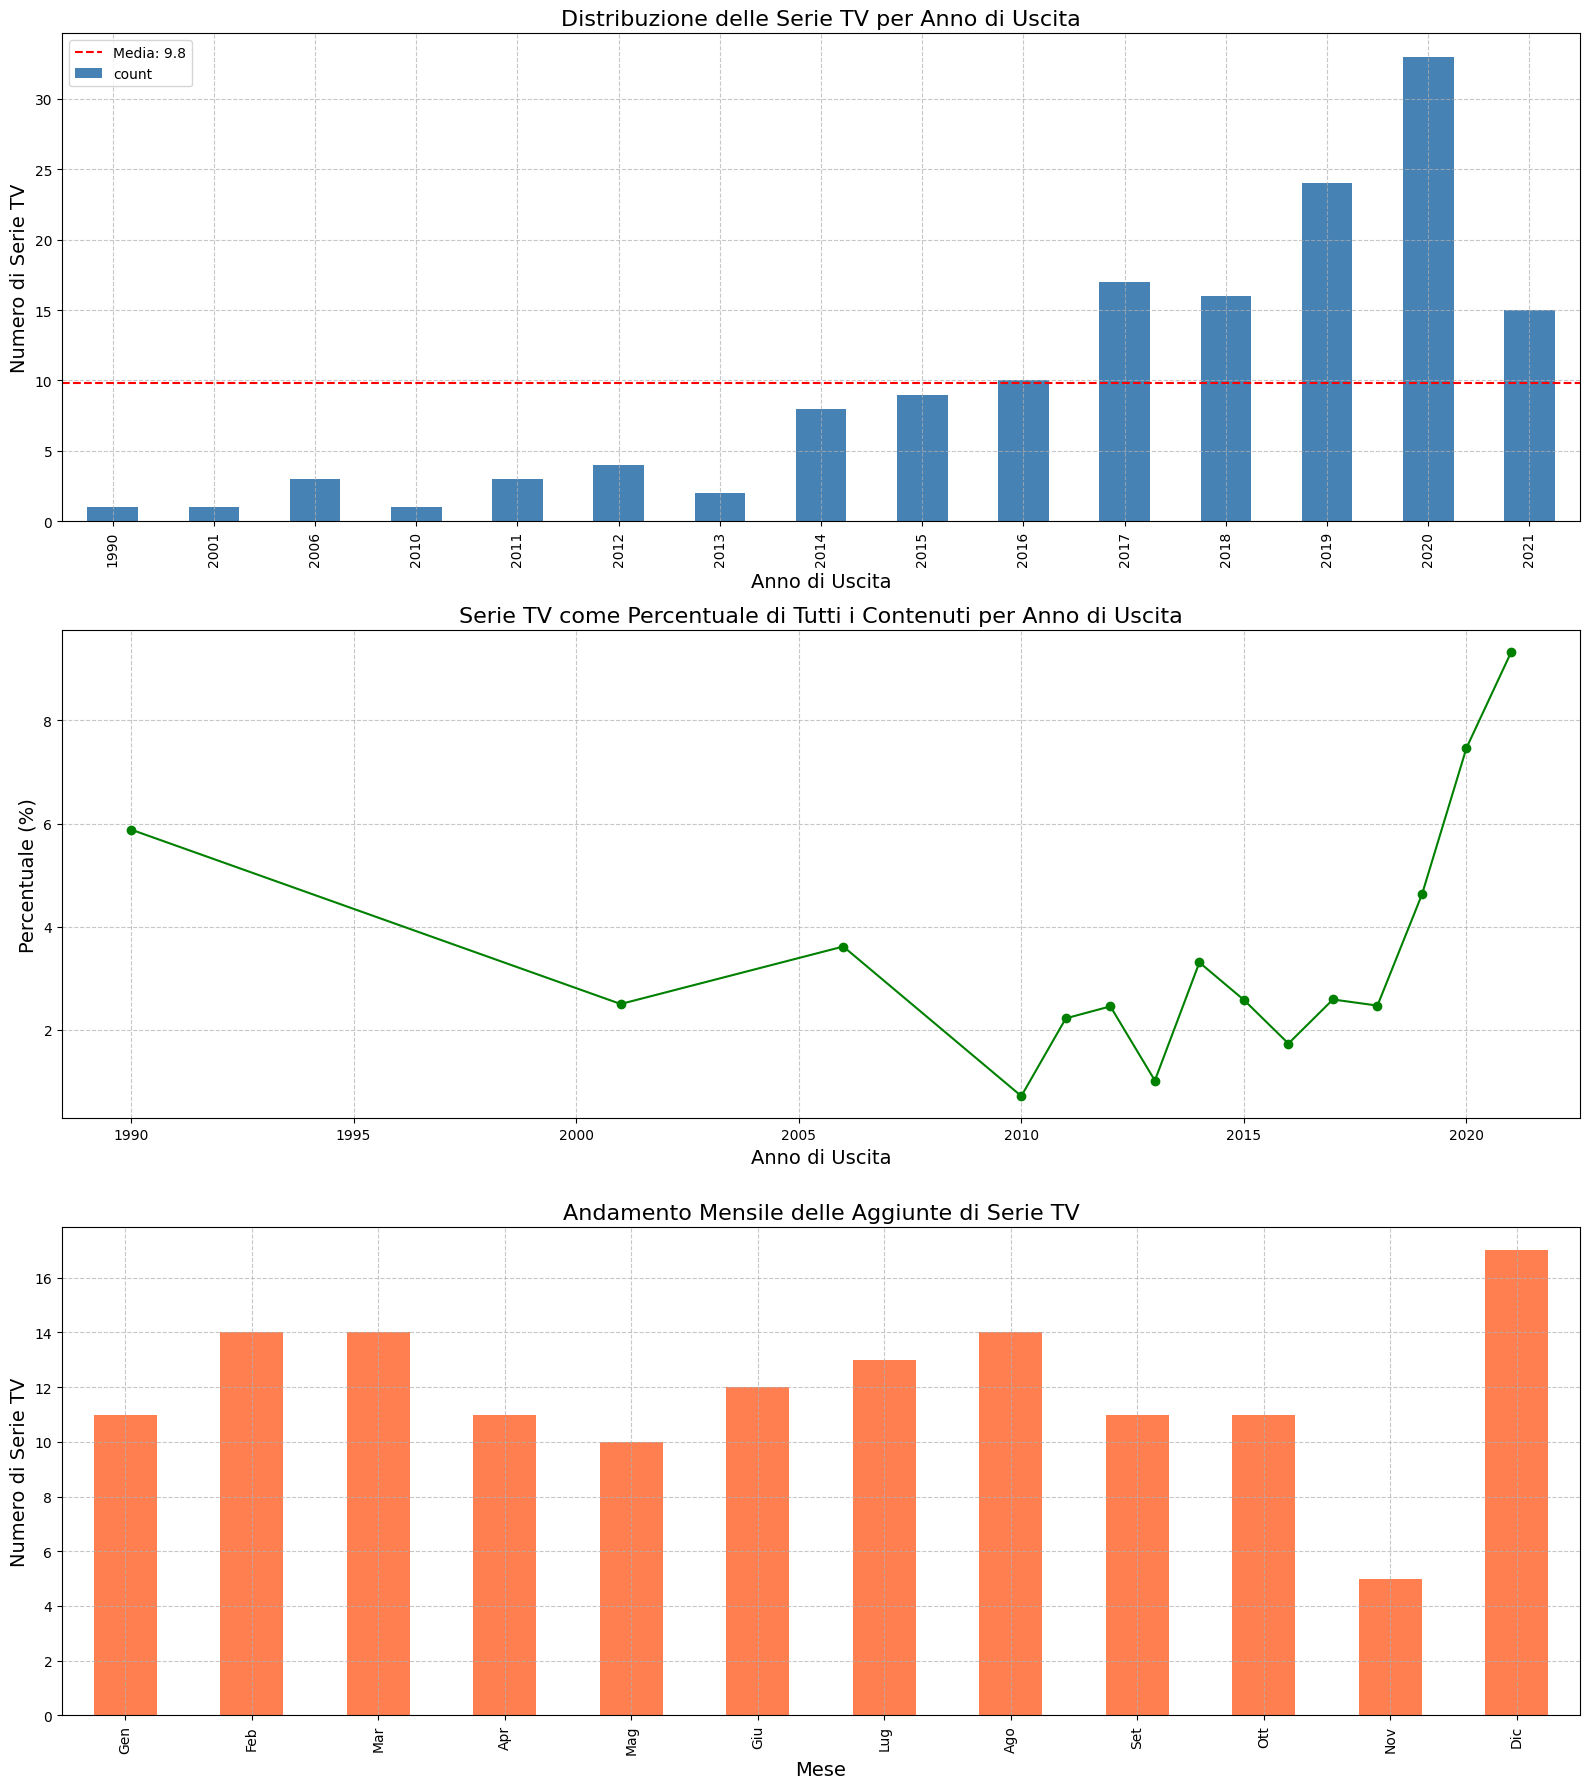

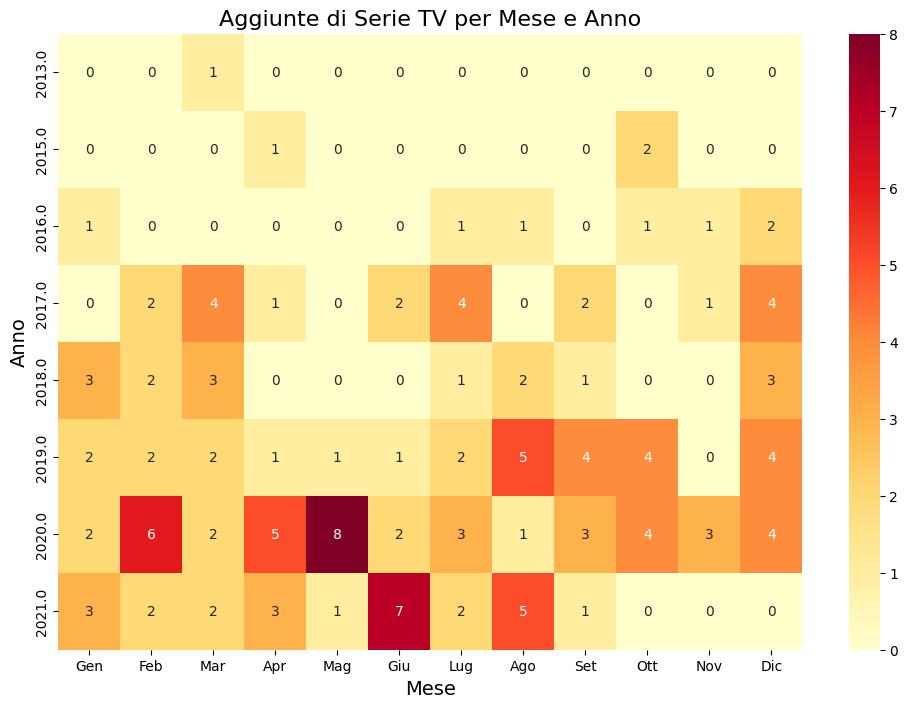


Anni con picchi significativi nelle uscite delle Serie TV (z-score > 2):
  2020: 33 serie (z-score: 2.43)


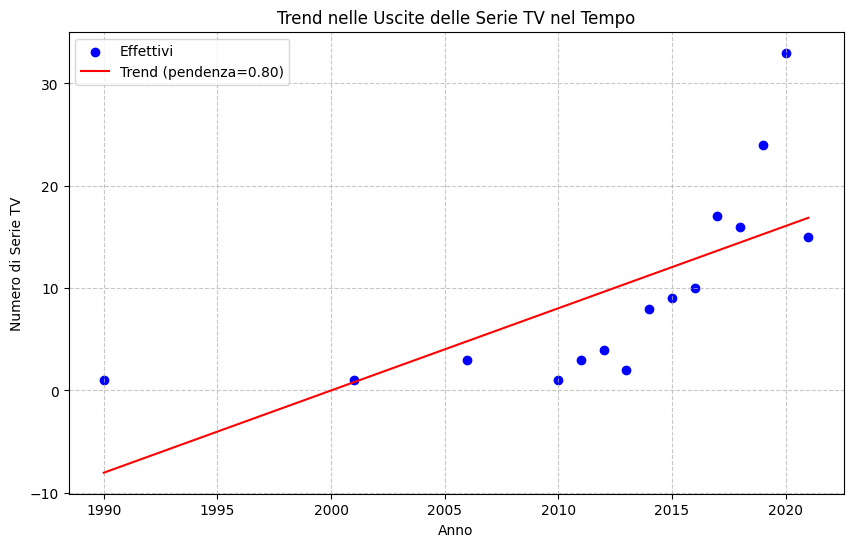


Coefficiente di trend: 0.80 serie per anno
Questo suggerisce un trend crescente nelle uscite delle Serie TV.


In [20]:
# Analizza la distribuzione delle uscite delle serie TV per identificare picchi significativi

# Filtra i dati per includere solo Serie TV
df_tv_shows = df[df['type'] == 'TV Show'].copy()
print(f"Numero di Serie TV nel dataset: {len(df_tv_shows)}")

# Ottieni distribuzioni per anno
tv_by_year = df_tv_shows['release_year'].value_counts().sort_index()
all_by_year = df['release_year'].value_counts().sort_index()

# Calcola la percentuale di Serie TV sul contenuto totale per anno
years = sorted(set(tv_by_year.index).intersection(all_by_year.index))
tv_percentage = pd.Series(
    [tv_by_year.get(year, 0) / all_by_year.get(year, 1) * 100 for year in years],
    index=years
)

# Analizza la data di aggiunta, se disponibile
if 'date_added' in df_tv_shows.columns:
    df_tv_shows['month_added'] = df_tv_shows['date_added'].dt.month
    df_tv_shows['year_added'] = df_tv_shows['date_added'].dt.year
    monthly_dist = df_tv_shows['month_added'].value_counts().sort_index()

# Visualizzazioni
plt.figure(figsize=(16, 18))

# Grafico 1: Serie TV per Anno di Uscita
plt.subplot(3, 1, 1)
ax1 = plt.gca()
tv_by_year.plot(kind='bar', color='steelblue', ax=ax1)
plt.title('Distribuzione delle Serie TV per Anno di Uscita', fontsize=16)
plt.xlabel('Anno di Uscita', fontsize=14)
plt.ylabel('Numero di Serie TV', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Aggiungi linea della media
mean_tv = tv_by_year.mean()
std_tv = tv_by_year.std()
plt.axhline(y=mean_tv, color='red', linestyle='--', label=f'Media: {mean_tv:.1f}')
plt.legend()

# Grafico 2: Serie TV come Percentuale di Tutti i Contenuti
plt.subplot(3, 1, 2)
tv_percentage.plot(kind='line', marker='o', color='green')
plt.title('Serie TV come Percentuale di Tutti i Contenuti per Anno di Uscita', fontsize=16)
plt.xlabel('Anno di Uscita', fontsize=14)
plt.ylabel('Percentuale (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Grafico 3: Andamento Mensile delle Aggiunte di Serie TV
if 'month_added' in df_tv_shows.columns:
    plt.subplot(3, 1, 3)
    monthly_dist.plot(kind='bar', color='coral')
    plt.title('Andamento Mensile delle Aggiunte di Serie TV', fontsize=16)
    plt.xlabel('Mese', fontsize=14)
    plt.ylabel('Numero di Serie TV', fontsize=14)
    plt.xticks(range(12), ['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu', 
                          'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic'])
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Grafico aggiuntivo: Heatmap delle aggiunte di serie TV per mese e anno
if 'month_added' in df_tv_shows.columns and 'year_added' in df_tv_shows.columns:
    plt.figure(figsize=(12, 8))
    heatmap_data = pd.crosstab(df_tv_shows['year_added'], df_tv_shows['month_added'])
    sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='g')
    plt.title('Aggiunte di Serie TV per Mese e Anno', fontsize=16)
    plt.xlabel('Mese', fontsize=14)
    plt.ylabel('Anno', fontsize=14)
    plt.xticks(np.arange(12) + 0.5, ['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu', 
                               'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic'])
    plt.show()

# Analisi statistica per identificare picchi significativi
z_scores = (tv_by_year - mean_tv) / std_tv
significant_years = z_scores[z_scores > 2]

print("\nAnni con picchi significativi nelle uscite delle Serie TV (z-score > 2):")
for year, z in significant_years.items():
    print(f"  {year}: {tv_by_year[year]} serie (z-score: {z:.2f})")

# Analisi del trend utilizzando la regressione lineare
X = np.array(sorted(tv_by_year.index)).reshape(-1, 1)
y = np.array([tv_by_year.get(i, 0) for i in sorted(tv_by_year.index)])

model = LinearRegression()
model.fit(X, y)

# Grafico della linea di tendenza
plt.figure(figsize=(10, 6))
plt.scatter(tv_by_year.index, tv_by_year.values, color='blue', label='Effettivi')
plt.plot(sorted(tv_by_year.index), model.predict(X), color='red', 
         label=f'Trend (pendenza={model.coef_[0]:.2f})')
plt.title('Trend nelle Uscite delle Serie TV nel Tempo')
plt.xlabel('Anno')
plt.ylabel('Numero di Serie TV')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print(f"\nCoefficiente di trend: {model.coef_[0]:.2f} serie per anno")
print(f"Questo suggerisce un trend {'crescente' if model.coef_[0] > 0 else 'decrescente'} nelle uscite delle Serie TV.")

L’analisi della distribuzione delle uscite delle Serie TV su Netflix mostra che, nel corso degli anni, ci sono stati alcuni picchi significativi nella produzione, identificati tramite lo z-score. In particolare, gli anni con z-score superiore a 2 rappresentano periodi in cui il numero di nuove Serie TV è stato nettamente superiore alla media storica. La percentuale di Serie TV rispetto al totale dei contenuti evidenzia inoltre una crescita costante, confermata anche dalla regressione lineare:<br>
il coefficiente positivo indica un trend crescente nelle uscite di Serie TV nel tempo. L’analisi mensile e la heatmap delle aggiunte suggeriscono anche una certa stagionalità nelle pubblicazioni. Complessivamente, questi risultati indicano che Netflix ha progressivamente investito sempre di più nelle Serie TV, rendendole una componente sempre più rilevante del proprio catalogo.

# Conclusione

Riassumendo, tirando le somme di quello che sono stati i quesiti posti in quest’analisi dati , possiamo concludere con :
1)	Evoluzione della produzione: Negli ultimi anni, Netflix ha aumentato costantemente la produzione di contenuti, con una crescita particolarmente marcata delle serie TV rispetto ai film. L’analisi delle tendenze e dei tassi di crescita mostra che le serie TV sono diventate una componente sempre più centrale dell’offerta, specialmente dopo il 2010 anche se la tendenza è aumentato ulteriormente nel tempo.<br>

2)	Relazione tra tipo e rating: Esiste una relazione statisticamente significativa tra il tipo di contenuto (film o serie TV) e il rating assegnato, come evidenziato dal test chi-quadro. Alcuni rating sono più frequenti nei film, altri nelle serie TV, riflettendo strategie di targetizzazione diverse.<br>

3)	Predizione del rating: I modelli di classificazione, in particolare la Random Forest, hanno mostrato buone prestazioni nel predire la fascia di rating dei titoli a partire da caratteristiche semplici come anno di uscita, durata e tipo. Questo suggerisce che alcune informazioni di base sono già fortemente indicative del rating assegnato. <br>

4)	Clustering dei contenuti: L’analisi di clustering ha identificato 5 gruppi naturali di contenuti, distinguibili sia per caratteristiche testuali (descrizione) che categoriche (tipo, rating). Questi cluster riflettono segmenti diversi del catalogo, utili per strategie di raccomandazione e analisi di mercato. <br>

5)	Picchi nelle uscite delle serie TV: L’analisi statistica e grafica ha evidenziato alcuni anni con picchi significativi nella produzione di serie TV, spesso legati a strategie aziendali o cambiamenti di mercato. La tendenza generale è comunque di crescita, con una stagionalità nelle aggiunte che suggerisce pianificazioni mirate. <br>

In sintesi, Netflix ha diversificato e ampliato la propria offerta nel tempo, puntando sempre più sulle serie TV e adattando i propri contenuti alle esigenze di rating e target. Le tecniche di analisi dati applicate hanno permesso di quantificare questi fenomeni e di individuare pattern utili sia per la comprensione del catalogo che per possibili applicazioni future in ambito di raccomandazione. <br>
